<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bibliotecas-e-Funções" data-toc-modified-id="Bibliotecas-e-Funções-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bibliotecas e Funções</a></span></li><li><span><a href="#Entendendo-os-Dados" data-toc-modified-id="Entendendo-os-Dados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Entendendo os Dados</a></span><ul class="toc-item"><li><span><a href="#Dados-Nulos" data-toc-modified-id="Dados-Nulos-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dados Nulos</a></span></li><li><span><a href="#Tipos-Primitivos" data-toc-modified-id="Tipos-Primitivos-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Tipos Primitivos</a></span></li><li><span><a href="#Exploração-Gráfica" data-toc-modified-id="Exploração-Gráfica-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Exploração Gráfica</a></span><ul class="toc-item"><li><span><a href="#Evolução-do-E-Commerce-no-Brasil" data-toc-modified-id="Evolução-do-E-Commerce-no-Brasil-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Evolução do E-Commerce no Brasil</a></span></li><li><span><a href="#E-Commerce-nos-Estados-Brasileiros" data-toc-modified-id="E-Commerce-nos-Estados-Brasileiros-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>E-Commerce nos Estados Brasileiros</a></span></li><li><span><a href="#Formas-de-Pagamento-Online" data-toc-modified-id="Formas-de-Pagamento-Online-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Formas de Pagamento Online</a></span></li><li><span><a href="#Categorias-de-Produtos" data-toc-modified-id="Categorias-de-Produtos-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Categorias de Produtos</a></span></li><li><span><a href="#Review-Score" data-toc-modified-id="Review-Score-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Review Score</a></span></li></ul></li></ul></li><li><span><a href="#Processamento-de-Linguagem-Natural" data-toc-modified-id="Processamento-de-Linguagem-Natural-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Processamento de Linguagem Natural</a></span><ul class="toc-item"><li><span><a href="#Contato-Inicial-com-o-Dataset" data-toc-modified-id="Contato-Inicial-com-o-Dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Contato Inicial com o Dataset</a></span></li><li><span><a href="#RegEx" data-toc-modified-id="RegEx-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RegEx</a></span></li><li><span><a href="#Stop-Words" data-toc-modified-id="Stop-Words-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Stop Words</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo alocar o desenvolvimento prático envolvendo múltiplos conjuntos de dados contendo informações a respeito do E-Commerce do Brasil, dentro de um contexto relacionado ao trabalho final da matéria de Processamento de Linguagem Natural ministrada na UFABC pelo professor Jesús Mena.

Os dados públicos levantados pela empresa _Olist_ contemplam aproximadamente 100.000 registros de pediso on-line (e anônimos) dispostos em 8 diferentes datasets. Essa implementação visa realizar um estudo nos dados contidos nestes conjuntos com ênfase na aplicação de técnicas de PLN para análise e classificação de sentimentos de clientes coletados através das críticas postadas antes, durante ou após aquisições on-line.

Link do dataset: [Kaggle-Brazilian-e-commerce](https://www.kaggle.com/olistbr/brazilian-ecommerce#olist_orders_dataset.csv)

# Bibliotecas e Funções

In [7]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
import missingno as msno
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer, LancasterStemmer, RegexpStemmer, SnowballStemmer

In [8]:
# Funções
def format_spines(ax, right_border=True):
    """
    Função responsável por formatar os eixos dos gráficos
    
    Input:
        ax: matplotlib axis
        right_border: flag booleano que indica a presença ou não da borda direita
    
    Output:
        None
    """    
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    
def bar_plot(x, y, df, ax, colors='Blues_d', hue=False, value=False):
    """
    Função responsável por plotar, configurar e personalizar um gráfico de barras

    Input:
        x: feature a ser plotada no eixo x
        y: feature a ser plotada no eixo y
        df: dataframe utilizado
        colors: palette padrão "Blues_d"
        hue: feature de separação, padrão False
        value: flag que define se o rótulo das barras será valor (True) ou porcentagem (False)
        
    Returns:
        None
    """
    # Realizando contagem da feature numérica (em x ou em y)
    try:
        ncount = sum(df[y])
    except:
        ncount = sum(df[x])
    
    # Plotando gráfico no eixo
    if hue != False:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, hue=hue, ax=ax, ci=None)
    else:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, ax=ax, ci=None)

    # Configurando porcentagem ou valor
    for p in ax.patches:
        xp=p.get_bbox().get_points()[:,0]
        yp=p.get_bbox().get_points()[1,1]
        if value:
            ax.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), 
                    ha='center', va='bottom')
        else:
            ax.annotate('{:.1f}%'.format(100.*yp/ncount), (xp.mean(), yp), 
                    ha='center', va='bottom')
            
def add_series_working_days(series_name, df, date_col1, date_col2):
    """
    Função extremamente importante: calcula os dias úteis entre duas datas e retorna este valor
    como uma coluna adicional em um dataframe
    
    Input:
        series_names: nome da nova série criada para alocar a diferença em dias úteis
        df: conjunto de dados onde as colunas de data se encontram
        date_col1: coluna de datas 1
        date_col2: coluna de datas 2
        
    Returns:
        df_return: dataframe com coluna de dias úteis já inserida
    """
    # Calculando lista com diferença entre datas
    time_list = []
    idx = 0
    second_date_series = df[date_col2].values.astype('datetime64[D]')
    for date in df[date_col1].values.astype('datetime64[D]'):
        second_date = second_date_series[idx]
        try:
            workdays = np.busday_count(date, second_date)
        except:
            workdays = np.NaN
        time_list.append(workdays)
        idx += 1
    
    # Adicionando ao dataframe e eliminando valores nulos
    df_return = df.copy()
    df_return[series_name] = pd.Series(time_list)
    df_return.dropna(inplace=True)
    
    return df_return

def communicate_params(frete, entrega, estimativa):
    """
    Função adicional criada para auxiliar na plotagem gráfica do dashboard de análise por estado
    
    Input:
        frete: valor do frete a ser plotado no gráfico em formato de texto
        entrega: tempo médio de entrega a ser plotado no gráfico em formato de texto
        estimativa: diferença entre estimativa e entrega ser plotada no gráfico em formato de texto
    
    Returns:
        None
    """
    # 
    """axs[0, 0].text(0.5, 0.12, str(f'Frete Médio \nR${frete:.2f}'),
                   fontsize=13, ha='center')
    axs[0, 0].axis('off')"""
    
    # Comunicando frete médio
    ax1.text(0.23, 0.6, f'R${frete:.2f}', fontsize=65)
    ax1.text(0.22, 0.45, 'é o valor médio de frete', fontsize=12)
    ax1.text(0.24, 0.4, 'para compras online', fontsize=12)
    ax1.axis('off')
    
    # Comunicando tempo médio de entrega
    axs[0, 1].text(0.5, 0.12, 
                   str(f'Tempo Médio de Entrega \n{int(entrega)} dias úteis.'),
                   fontsize=13, ha='center')
    axs[0, 1].axis('off')
    
    # Comunicando diferença entre tempo de entrega e tempo estimado
    if mean_diff_estimative > 0:
        inf = 'antes'
    else:
        inf = 'depois'
    text_diff_estimative = f'Em média, entregas \nacontecem {int(estimativa)} dias úteis \
\n{inf} do período estimado.'
    axs[0, 2].text(0.5, 0.10, 
                   str(text_diff_estimative), fontsize=13, ha='center')
    axs[0, 2].axis('off')
    
def plot_param(df, col, title, xlim, n_row, n_col, y='customer_state', div_xlim=0, 
               one_axis=False, xlabel=[], ylabel='Estado'):
    """
    Função utilizada para plotar um estudo comparativo de acordo com o tema, 
    separando análises de dos 5 Melhores e 5 Piores em assuntos pré-determinados
    
    Input:
        df: dataframe com as informações
        col: coluna com a informação a ser analisada
        title: título da análise
        xlim: limite no eixo X dos números
        n_row: índice da linha onde a plotagem será realizada
        n_col: índice da coluna onde a plotagem será realizada
    """
    # Configurando eixos
    if one_axis:
        ax_top = axs[n_col]
        ax_last = axs[n_col+1]
    else:
        ax_top = axs[n_row, n_col]
        ax_last = axs[n_row+1, n_col]
    
    # Primeiro passo: plotando Top 5
    df.sort_values(by=col, ascending=False, inplace=True)
    top5 = df.iloc[:5, :]
    sns.barplot(x=col, y=y, data=top5, ci=None, palette='Blues_d', ax=ax_top)
    format_spines(ax_top, right_border=False)
    ax_top.set_title(title)
    ax_top.set_xlim(0, xlim)
    ax_top.set_xlabel(xlabel)
    if n_col > 0:
        ax_top.set_ylabel('')
    else:
        ax_top.set_ylabel(ylabel)
    
    # Segundo passo: plotando Top 5 inverso
    last5 = df.iloc[-5:, :]
    sns.barplot(x=col, y=y, data=last5, ci=None, palette='Blues_d', ax=ax_last)
    format_spines(ax_last, right_border=False)
    ax_last.set_title(title.replace('Maior', 'Menor'))
    if div_xlim > 0:
        ax_last.set_xlim(0, xlim/div_xlim)
    else:
        ax_last.set_xlim(0, xlim)
    ax_last.set_xlabel(xlabel)
    if n_col > 0:
        ax_last.set_ylabel('')
    else:
        ax_last.set_ylabel(ylabel)
        
def donut_plot(col, ax, df, labels, text='', flag_ruido = 0,
               colors=['navy', 'lightsteelblue', 'lightgreen', 'crimson', '']):
    """
    Função responsável por plotar um gráfico de rosca customizado
    
    Input:
        col: coluna a ser analisada e plotada no gráfico de rosca
        ax: matplotlib axis
        df: DataFrame contendo os dados
        labels: índice de labels da coluna a ser plotada
        text: texto a ser plotado no centro do gráfico de rosca
        flag_ruido: indica a quantidade de elementos a serem eliminados da plotagem
        colors: lista de cores para plotagem (4 cores default)
    """
    flag_ruido = flag_ruido * -1
    if flag_ruido < 0:
        sizes = df[col].value_counts().values[:flag_ruido]
        labels = labels[:flag_ruido]
    else:
        sizes = df[col].value_counts().values
    center_circle = plt.Circle((0,0), 0.80, color='white')
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%')
    ax.add_artist(center_circle)
    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    
def text_process(c):
    """
    Função responsável por remover as pontuações e as stopwords das críticas.
    
    Input:
        c: crítica do cliente
    
    Output:
        lista sem pontuação e sem stopwords
    """
    # Retira pontuações
    nopunc = [char for char in c if char not in string.punctuation]

    # Junta-os para formar strings
    nopunc = ''.join(nopunc)
    
    # Remove as stopwords
    return [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('portuguese')]

def stem_processing(c):
    """
    Função responsável por realizar o stemming nas críticas.
    
    Input:
        c: crítica do cliente
    
    Output:
        critica aplicado stemming
    """
    
    stemmer = PorterStemmer()
    return map(lambda word: stemmer.stem(word),[word for word in c])

# Entendendo os Dados

Datasets disponíveis:

    olist_customers_dataset.csv
    olist_geolocation_dataset.csv
    olist_orders_dataset.csv
    olist_order_items_dataset.csv
    olist_order_payments_dataset.csv
    olist_order_reviews_dataset.csv
    olist_products_dataset.csv
    olist_sellers_dataset.csv
    product_category_name_translation.csv

<img src="images/brazilian_e-commerce_schema.png" alt="Dataset Schema" style="width: 750px;"/>

Acima, é possível visualizar um modelo que transcreve o problema de negócio. A relação entre os datasets é dada através de chaves estrangeiras contidas em cada um dos conjuntos, sendo necessária a aplicação de métodos específicos (join, concat, entre outros) para a efetiva união e posterior análise dos conjuntos. Neste primeiro momento, vamos ler os conjuntos de dados e verificar as dimensões de cada um deles.

In [9]:
# Lendo arquivos
olist_customer = pd.read_csv('olist_customers_dataset.csv')
olist_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
olist_orders = pd.read_csv('olist_orders_dataset.csv')
olist_order_items = pd.read_csv('olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
olist_products = pd.read_csv('olist_products_dataset.csv')
olist_sellers = pd.read_csv('olist_sellers_dataset.csv')

In [10]:
# Exemplo: dataset de pedidos
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
# Visualizando colunas em cada um dos conjuntos
dataframes = {
    'Customers': olist_customer,
    'Geolocation': olist_geolocation,
    'Orders': olist_orders,
    'Items': olist_order_items,
    'Payments': olist_order_payments,
    'Reviews': olist_order_reviews,
    'Products': olist_products,
    'Sellers': olist_sellers
}

for name, df in dataframes.items():
    print(f'{name}: {len(df.columns)} colunas')
    print(f'{list(df.columns)}\n')

Customers: 5 colunas
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Geolocation: 5 colunas
['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

Orders: 8 colunas
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Items: 7 colunas
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Payments: 5 colunas
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Reviews: 7 colunas
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']

Products: 9 colunas
['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty

In [12]:
# Chaves estrangeiras
for name, df in dataframes.items():
    chaves = [col for col in df.columns if '_id' in col or 'code' in col]
    print(f'{name}: {len(chaves)} chaves PK ou FK')
    print(f'{chaves}\n')

Customers: 3 chaves PK ou FK
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix']

Geolocation: 1 chaves PK ou FK
['geolocation_zip_code_prefix']

Orders: 2 chaves PK ou FK
['order_id', 'customer_id']

Items: 4 chaves PK ou FK
['order_id', 'order_item_id', 'product_id', 'seller_id']

Payments: 1 chaves PK ou FK
['order_id']

Reviews: 2 chaves PK ou FK
['review_id', 'order_id']

Products: 1 chaves PK ou FK
['product_id']

Sellers: 2 chaves PK ou FK
['seller_id', 'seller_zip_code_prefix']



## Dados Nulos

Vamos verificar a presença de dados nulos em uma visão macro, considerando os datasets como um todo

In [13]:
# Em quais datasets existem dados nulos?
for name, df in dataframes.items():
    print(f'{name:<11} - {df.isnull().any().any()}')

Customers   - False
Geolocation - False
Orders      - True
Items       - False
Payments    - False
Reviews     - True
Products    - True
Sellers     - False


Vamos agora quantificar os dados nulos em todos os conjuntos

In [14]:
# Quantificando dados nulos
for name, df in dataframes.items():
    if df.isnull().any().any():
        print(f'Dataset: {name}\n')
        print(f'{df.isnull().sum()}\n')

Dataset: Orders

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Dataset: Reviews

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Dataset: Products

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64



* Os dados nulos no dataset **Orders** são dados por:

    - Pedidos sem data de aprovação;
    - Pedidos que não foram entregues na transportadora;
    - Pedidos ainda não entregues aos clientes.


* Os dados nulos no dataset **Reviews** são dados por:
    - Pedidos sem comentários;
    - Comentários postados sem título;


* Os dados nulos no dataset **Produtos** são dados por:
    - Produtos sem categoria, sem informações de nome, descrição, fotos e atributos

## Tipos Primitivos

Ainda trabalhando nos passos precedentes a análise exploratória e posterior implementação das técnicas de PLN para classificação de sentimentos, é preciso verificar os tipos primitivos dos dados para aplicar as transformações que se fizerem necessárias

In [15]:
# Verificando tipos primitivos
for name, df in dataframes.items():
    print(f'Dataset: {name}\n')
    print(f'{df.dtypes}\n')

Dataset: Customers

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Dataset: Geolocation

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

Dataset: Orders

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Dataset: Items

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
frei

As colunas a seguir devem ser transformadas para o tipo *datetime*:

    order_purchase_timestamp
    order_approved_at
    order_delivered_carrier_date
    order_delivered_customer_date
    order_estimated_delivery_date

In [16]:
# Aplicando transformações
time_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
           'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in time_cols:
    olist_orders[col] = pd.to_datetime(olist_orders[col])
    
# Verificando
olist_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

## Exploração Gráfica

Para que possa ser criado um melhor relacionamento com os dados, objetivando o ganho de insights a respeito do comportamento de clientes que realizam compras on-line, serão propostas análises gráficas. Esta sessão é de extrema importância para que, ao serem aplicadas técnicas de PLN para identificar o sentimento de clientes a partir de comentários e críticas postadas antes, durante ou após as compras, seja captada a ideia final de uma forma mais ampla, auxiliando assim no entendimento dos resultados obtidos.

### Evolução do E-Commerce no Brasil

Sabe-se que a realização de compras online é uma modalidade que cresce cada dia mais ao redor do mundo. No Brasil, isso não é diferente. Há poucos anos atrás, o receio e a sensação de insegurança eram os principais termos que relacionavam aquisições via e-commerce. Hoje, muitos preferem associar a comodidade e a facilidade para descrever essa modalidade de compra.

Os dados propostos refletem essa análise?

In [17]:
# Criando nova coluna para ano
olist_orders['order_purchase_year'] = \
olist_orders['order_purchase_timestamp'].apply(lambda x: x.year)

# Criando nova coluna para mês
olist_orders['order_purchase_month'] = \
olist_orders['order_purchase_timestamp'].apply(lambda x: x.month)

# Criando nova coluna para dia da semana
olist_orders['order_purchase_dayofweek'] = \
olist_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)

* **Quantidade de Pedidos por Ano**

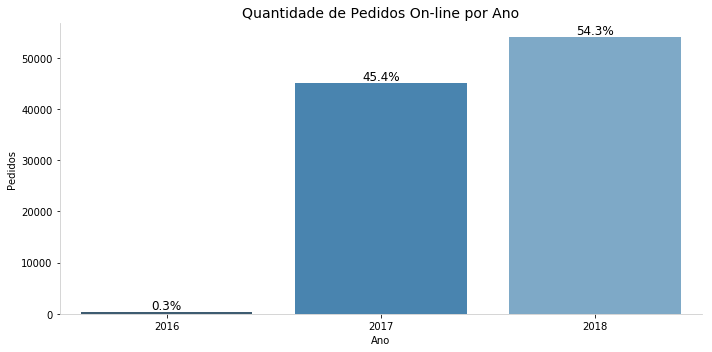

In [18]:
# Preparando plotagem
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='order_purchase_year', data=olist_orders, palette='Blues_d')
format_spines(ax, right_border=False)

# Mostrando frequência
ncount = len(olist_orders)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size=12)

ax.set_title('Quantidade de Pedidos On-line por Ano', size=14)
ax.set_ylabel('Pedidos')
ax.set_xlabel('Ano')

plt.tight_layout()
plt.show()

Realmente é possível notar um crescimento na quantidade de compras online feitas entre 2017 e 2018. Entretanto, é preciso ter cuidado com o valor extremamente baixo relacionado ao ano de 2016. É possível que o conjunto de dados não contemple a totalidade deste ano.

In [19]:
# Range das amostras
print(f'Data mínima presente: {olist_orders["order_purchase_timestamp"].min()}')
print(f'Data máxima presente: {olist_orders["order_purchase_timestamp"].max()}')

Data mínima presente: 2016-09-04 21:15:19
Data máxima presente: 2018-10-17 17:30:18


* **Total de Vendas ao Longo do Tempo**

In [20]:
# Unindo datasets de pedidos e itens
df_orders_items = olist_orders.merge(olist_order_items, on='order_id', how='inner')

# Criando uma coluna para somar o valor do item + frete
df_orders_items['total_sales'] = df_orders_items['price'] + df_orders_items['freight_value']

# Agrupando datasets por vendas mensais e anuais
df_sales = df_orders_items.groupby(['order_purchase_year', 'order_purchase_month'], 
                         as_index=False).sum()
df_sales = df_sales.loc[:, ['order_purchase_year', 'order_purchase_month', 'total_sales']]

# Separando conjuntos por ano
df_sales_2016 = df_sales[df_sales['order_purchase_year']==2016]
df_sales_2017 = df_sales[df_sales['order_purchase_year']==2017]
df_sales_2018 = df_sales[df_sales['order_purchase_year']==2018]

In [21]:
# Preenchendo meses não presentes nos datasets
months = np.arange(1, 13)
df_append = pd.DataFrame({})
grouped_dfs = df_sales_2016, df_sales_2017, df_sales_2018
years = [2016, 2017, 2018]
idx = 0

# Laço para preenchimento dos dados
for df in grouped_dfs:
    for month in months:
        # Se existe um mês não presente no dataset
        if month not in df['order_purchase_month'].values:
            dict_append = {
                'order_purchase_year': years[idx],
                'order_purchase_month': month,
                'total_sales': 0
            }
            df_append = df_append.append(dict_append, ignore_index=True)
    # Insere o dicionário no dataset e ordena
    df = df.append(df_append).astype(int)
    df.sort_values(by='order_purchase_month', inplace=True)
    df_append = pd.DataFrame({})
    # Atribui os resultados aos respectivos conjuntos
    if idx == 0:
        df_sales_2016 = df
    elif idx == 1:
        df_sales_2017 = df
    else:
        df_sales_2018 = df
    idx += 1

/home/diego/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


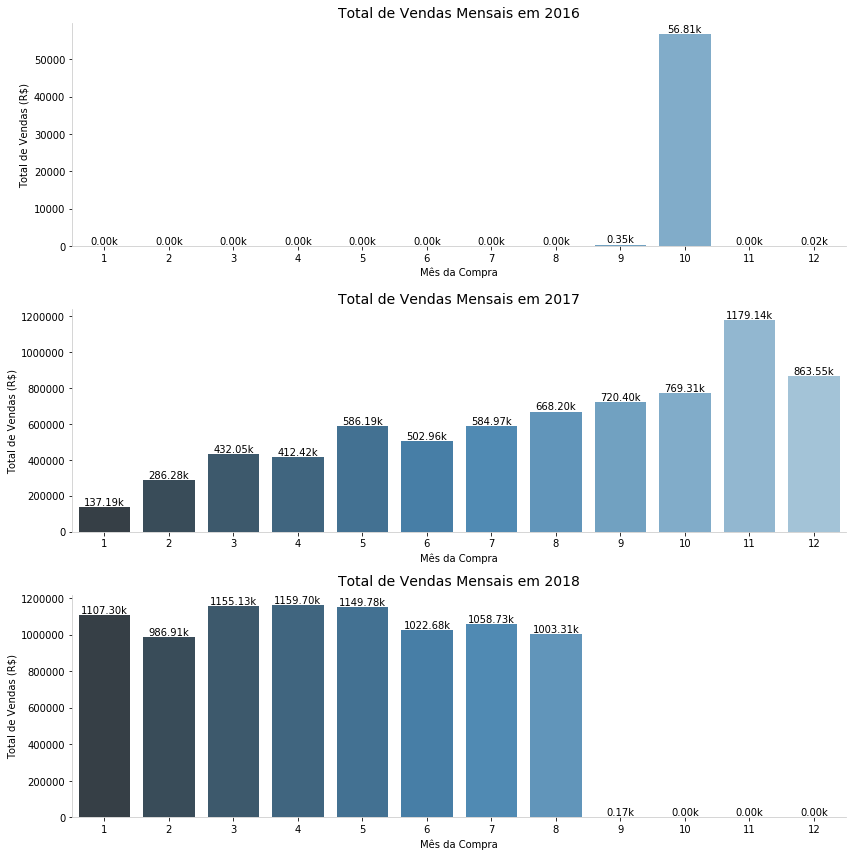

In [22]:
# Quantidade de vendas online por mês (neste dataset)
fig, axs = plt.subplots(3, 1, figsize=(12, 12))
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2016, ax=axs[0], value=True)
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2017, ax=axs[1], value=True)
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2018, ax=axs[2], value=True)

# Formatando
axs_list = axs[0], axs[1], axs[2]
for ax in axs_list:
    format_spines(ax, right_border=False)
    ax.set_xlabel('Mês da Compra')
    ax.set_ylabel('Total de Vendas (R$)')
axs[0].set_title('Total de Vendas Mensais em 2016', size=14)
axs[1].set_title('Total de Vendas Mensais em 2017', size=14)
axs[2].set_title('Total de Vendas Mensais em 2018', size=14, pad=10)
plt.tight_layout()
plt.show()

* **Evolução de Vendas em uma Linha do Tempo**

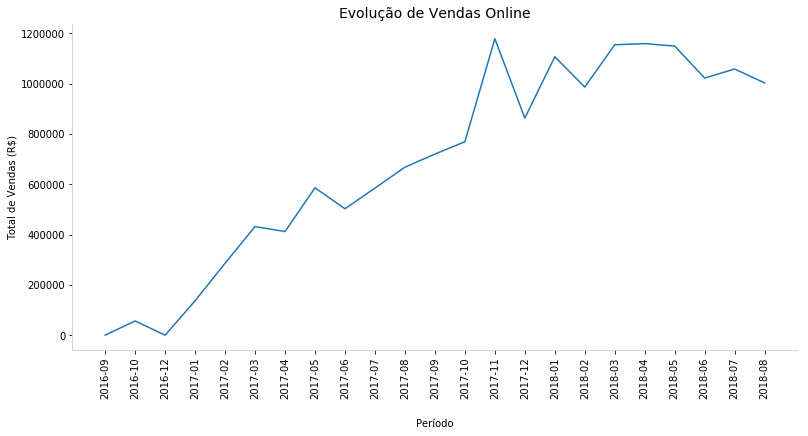

In [23]:
# Transformando coluna mês para correta ordenação na plotagem
df_sales['order_purchase_month'] = df_sales['order_purchase_month'].astype(str).\
apply(lambda x: '0' + x if len(x) == 1 else x)

# Criando nova coluna com ano-mês
df_sales['month_year'] = df_sales['order_purchase_year'].astype(str) + '-' + \
df_sales['order_purchase_month'].astype(str)

# Retornando o tipo primitivo da coluna mês
df_sales['order_purchase_month'] = df_sales['order_purchase_month'].astype(int)

# Plotando dados
fig, ax = plt.subplots(figsize=(13, 6))
ax = sns.lineplot(x='month_year', y='total_sales', data=df_sales.iloc[:-1, :])
format_spines(ax, right_border=False)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Período', labelpad=20)
ax.set_ylabel('Total de Vendas (R$)')
ax.set_title('Evolução de Vendas Online', size=14)
plt.show()

* **Evolução de Vendas nos Últimos Dois Anos**

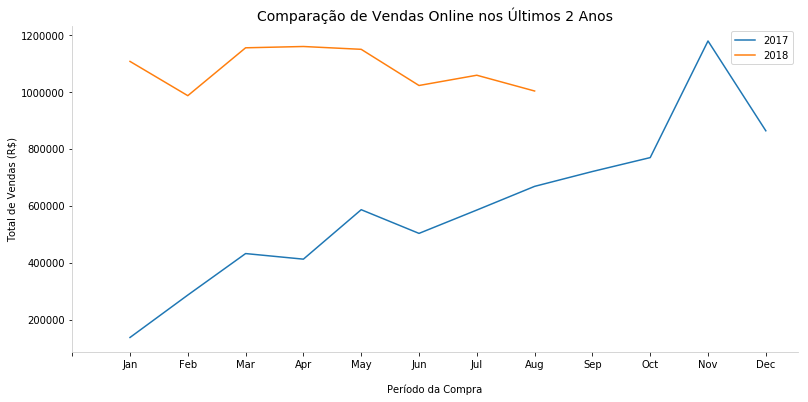

In [24]:
# Cruzando dados de 2017 e 2018
fig, ax = plt.subplots(figsize=(13, 6))
ax = sns.lineplot(x='order_purchase_month', y='total_sales', data=df_sales_2017, label='2017')
ax = sns.lineplot(x='order_purchase_month', y='total_sales', 
                  data=df_sales_2018.iloc[:-4, :], label='2018')
format_spines(ax, right_border=False)
ax.set_xlabel('Período da Compra', labelpad=15)
ax.set_ylabel('Total de Vendas (R$)')
ax.set_title('Comparação de Vendas Online nos Últimos 2 Anos', size=14)
plt.xticks(np.arange(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 
                           'Oct', 'Nov', 'Dec'])
plt.show()

* **Média de Vendas por Dia da Semana**

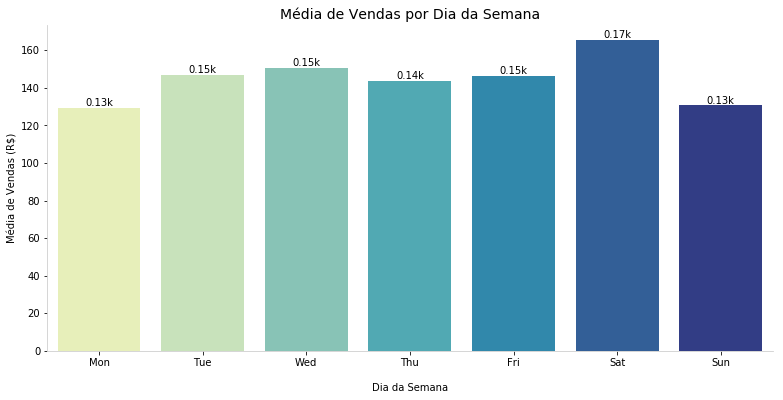

In [25]:
# Média de vendas por dia da semana
df_sales_dow_mean = \
df_orders_items.groupby(['order_purchase_year', 'order_purchase_dayofweek'], 
                        as_index=False).mean().iloc[:, np.c_[0, 1, 6][0]]

# Plotando gráfico
fig, ax = plt.subplots(figsize=(13, 6))
bar_plot(x='order_purchase_dayofweek', y='total_sales', ax=ax,
         df=df_sales_dow_mean, colors='YlGnBu', value=True)
ax.set_xlabel('Dia da Semana', labelpad=15)
ax.set_ylabel('Média de Vendas (R$)')
ax.set_title('Média de Vendas por Dia da Semana', size=14)
format_spines(ax, right_border=False)
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

### E-Commerce nos Estados Brasileiros

Após entender um pouco mais sobre como o e-commerce no Brasil vem evoluindo e como isso se transmite a partir do conjunto de dados utilizado, será proposta uma análise que leva em consideração a atuação do comércio online em cada um dos estados brasileiros.

* **Total de Vendas Online por Estado**

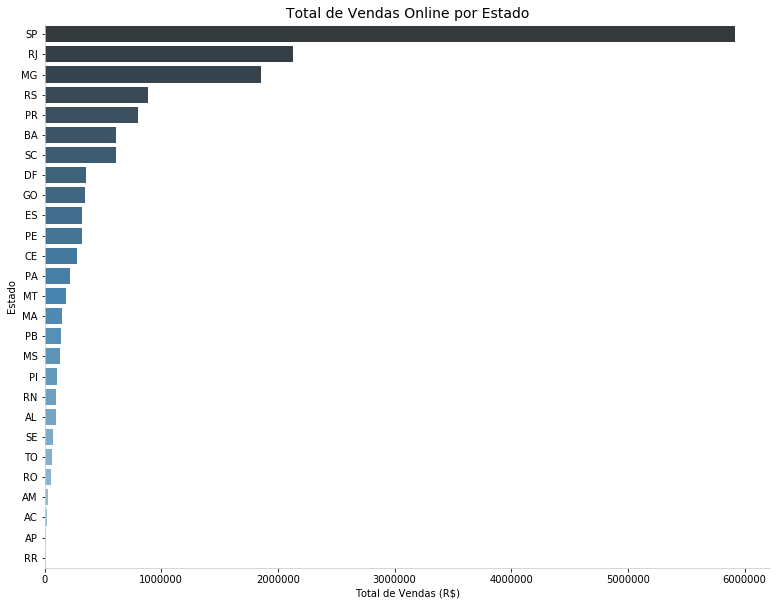

In [26]:
# Unindo dataset de clientes
df_sales_customer = df_orders_items.merge(olist_customer, on='customer_id', how='inner')

# Agrupando total de vendas por estado
df_sales_state = df_sales_customer.groupby(['customer_state'], 
                                          as_index=False).sum().iloc[:, np.c_[(0, -2, -3)][0]]
df_sales_state.sort_values(by='total_sales', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(13, 10))
sns.barplot(x='total_sales', y='customer_state', data=df_sales_state, ci=None,
                 palette='Blues_d')
format_spines(ax, right_border=False)
ax.set_title('Total de Vendas Online por Estado', size=14)
ax.set_xlabel('Total de Vendas (R$)')
ax.set_ylabel('Estado')
plt.show()

Para a próxima plotagem gráfica, serão realizados alguns preparativos nos dados com o objetivo de criar uma visão geral sobre os Estados considerando:
* **Valor do frete**
* **Tempo médio de entrega**
* **Diferença entre data estimativa e data de entrega**

In [27]:
# Calculando dias úteis de entrega
df_delivery_time = add_series_working_days(series_name='time_to_delivery', 
                                           df=df_sales_customer,
                                           date_col1 = 'order_purchase_timestamp', 
                                           date_col2 = 'order_delivered_customer_date')

# Agrupando tempo médio de entrega por estado
df_delivery_time = df_delivery_time.groupby(['customer_state'], as_index=False).mean()
df_delivery_time = df_delivery_time.iloc[:, np.c_[(0, -1)][0]]

# Calculando dias úteis entre a data de entrega e a data estimada
df_diff_est_deliv = add_series_working_days(series_name='diff_est_deliv', 
                                           df=df_sales_customer,
                                           date_col1 = 'order_delivered_customer_date', 
                                           date_col2 = 'order_estimated_delivery_date')

# Agrupando tempo médio de entrega por estado
df_diff_est_deliv = df_diff_est_deliv.groupby(['customer_state'], as_index=False).mean()
df_diff_est_deliv = df_diff_est_deliv.iloc[:, np.c_[(0, -1)][0]]
df_diff_est_deliv['diff_est_deliv'] = df_diff_est_deliv['diff_est_deliv'].astype(int)

# Calculando parâmetros informativos
df_mean_freight = df_sales_customer.groupby(['customer_state'], 
                                as_index=False).mean().iloc[:, np.c_[(0, -2, -3)][0]]
mean_freight_value = df_mean_freight['freight_value'].mean()
mean_delivery_time = df_delivery_time['time_to_delivery'].mean()
mean_diff_estimative = df_diff_est_deliv['diff_est_deliv'].mean()

In [28]:
def communicate_params(frete, entrega, estimativa):
    """
    Função adicional criada para auxiliar na plotagem gráfica do dashboard de análise por estado
    
    Input:
        frete: valor do frete a ser plotado no gráfico em formato de texto
        entrega: tempo médio de entrega a ser plotado no gráfico em formato de texto
        estimativa: diferença entre estimativa e entrega ser plotada no gráfico em formato de texto
    
    Returns:
        None
    """
    # Comunicando o frete
    axs[0, 0].text(0.10, 0.30, f'R${frete:.2f}', fontsize=45)
    axs[0, 0].text(0.20, 0.12, 'é o valor médio de frete', fontsize=12)
    axs[0, 0].text(0.25, 0.00, 'para compras online', fontsize=12)
    axs[0, 0].axis('off')

    # Comunicando tempo médio de entrega
    axs[0, 1].text(0.13, 0.30, f'{entrega:.2f}', fontsize=45)
    axs[0, 1].text(0.66, 0.30, 'dias úteis', fontsize=12)
    axs[0, 1].text(0.12, 0.12, 'é o tempo médio de entrega', fontsize=12)
    axs[0, 1].text(0.23, 0.00, 'para compras online', fontsize=12)
    axs[0, 1].axis('off')

    # Comunicando diferença entre tempo de entrega e tempo estimado
    axs[0, 2].text(0.18, 0.30, f'{estimativa:.2f}', fontsize=45)
    axs[0, 2].text(0.62, 0.30, 'dias úteis', fontsize=12)
    axs[0, 2].text(0.17, 0.12, 'é a diferença entre a data', fontsize=12)
    axs[0, 2].text(0.13, 0.00, 'estimada e a data de entrega', fontsize=12)
    axs[0, 2].axis('off') 

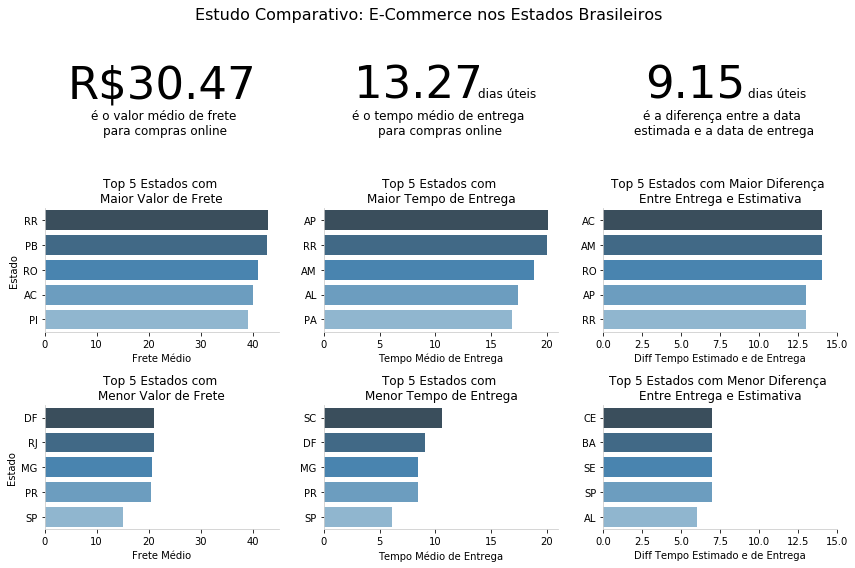

In [29]:
# Plotando
fig, axs = plt.subplots(3, 3, figsize=(12, 8))
communicate_params(mean_freight_value, mean_delivery_time, mean_diff_estimative)

# Plotando informações de frete
plot_param(df=df_mean_freight, col='freight_value', 
           title='Top 5 Estados com \nMaior Valor de Frete', xlim=45, n_row=1, n_col=0, xlabel='Frete Médio')

# Plotando informações sobre tempo de entrega
plot_param(df=df_delivery_time, col='time_to_delivery', 
           title='Top 5 Estados com \nMaior Tempo de Entrega', xlim=21, n_row=1, n_col=1, 
           xlabel='Tempo Médio de Entrega')

# Plotando informações sobre diferença entre data de entrega e data estimada
plot_param(df=df_diff_est_deliv, col='diff_est_deliv', 
           title='Top 5 Estados com Maior Diferença \nEntre Entrega e Estimativa', 
           xlim=15, n_row=1, n_col=2, xlabel='Diff Tempo Estimado e de Entrega')

plt.suptitle('Estudo Comparativo: E-Commerce nos Estados Brasileiros', size=16)
plt.tight_layout()
plt.show()

### Formas de Pagamento Online

Neste tópico, serão estudados as formas de pagamento mais comuns encontrada em transações online.

* **Frequência de Métodos de Pagamento e Evolução ao Longo do Tempo**

In [30]:
# Evolução de meios de pagamento
df_orders_payments = olist_orders.merge(olist_order_payments, on='order_id', how='left')
payments_evolution = df_orders_payments.groupby(by=['order_purchase_year', 'order_purchase_month',
                                                    'payment_type'], as_index=False).count().iloc[:, :4]

payments_evolution = payments_evolution.query('payment_type != "not_defined"')

# Transformando coluna mês para correta ordenação na plotagem
payments_evolution['order_purchase_month'] = payments_evolution['order_purchase_month'].astype(str).\
apply(lambda x: '0' + x if len(x) == 1 else x)

# Criando nova coluna com ano-mês
payments_evolution['month_year'] = payments_evolution['order_purchase_year'].astype(str) + '-' + \
payments_evolution['order_purchase_month'].astype(str)

# Retornando o tipo primitivo da coluna mês
payments_evolution['order_purchase_month'] = payments_evolution['order_purchase_month'].astype(int)

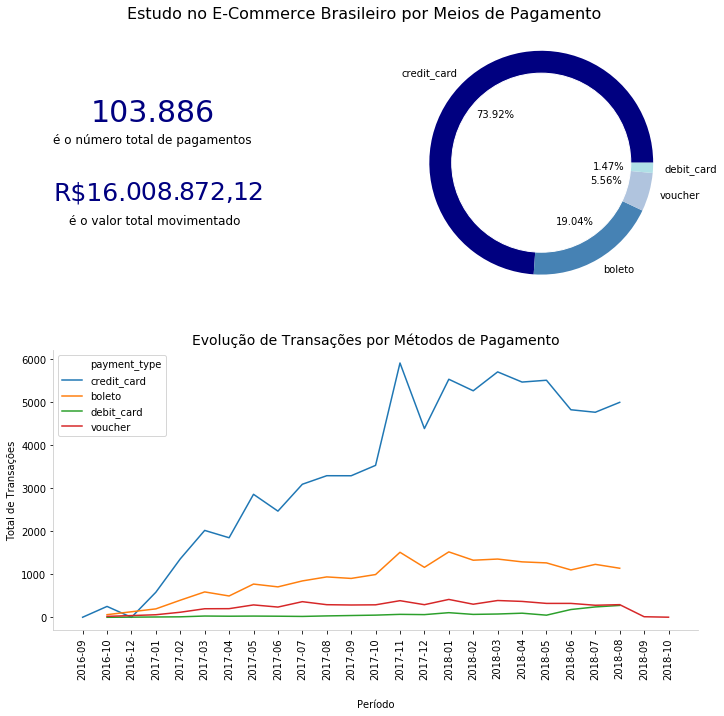

In [31]:
fig = plt.figure(constrained_layout=True, figsize=(10, 10))

# Definindo eixos
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# Plotando receita total
total_transacoes = len(olist_order_payments)
total_pagamentos = olist_order_payments['payment_value'].sum()
ax1.text(0.12, 0.65, f'{str(total_transacoes)[:3]}.', fontsize=30, color='navy')
ax1.text(0.33, 0.65, f'{str(total_transacoes)[3:]}', fontsize=30, color='navy')
ax1.text(0.00, 0.57, 'é o número total de pagamentos', fontsize=12)
ax1.text(0.00, 0.37, f'R${str(total_pagamentos)[:2]}.', fontsize=25, color='navy')
ax1.text(0.23, 0.37, f'{str(total_pagamentos)[2:5]}.', fontsize=25, color='navy')
ax1.text(0.40, 0.37, f'{str(total_pagamentos)[5:8]},', fontsize=25, color='navy')
ax1.text(0.57, 0.37, f'{str(total_pagamentos)[9:]}', fontsize=25, color='navy')
ax1.text(0.05, 0.28, 'é o valor total movimentado', fontsize=12)
ax1.axis('off')

# Plotando proporção de métodos de pagamento
payments_labels = olist_order_payments['payment_type'].value_counts().index
text = f'Total de \nTransações\n\n{total_transacoes}'
colors = ['navy', 'steelblue', 'lightsteelblue', 'powderblue']
donut_plot('payment_type', ax2, olist_order_payments, labels=payments_labels, text='', 
           colors=colors, flag_ruido=1)
#ax.set_title('Métodos de Pagamentos em Compras Online', size=14)

# Plotando evolução de vendas por método de pagamento
sns.lineplot(x='month_year', y='order_id', data=payments_evolution, hue='payment_type', ax=ax3)
format_spines(ax3, right_border=False)
ax3.tick_params(axis='x', labelrotation=90)
ax3.set_xlabel('Período', labelpad=20)
ax3.set_ylabel('Total de Transações')
ax3.set_title('Evolução de Transações por Métodos de Pagamento', size=14)

fig.suptitle("Estudo no E-Commerce Brasileiro por Meios de Pagamento", size=16)    

plt.show()

### Categorias de Produtos

In [32]:
# Unindo datasets e preparando demais datasets para plotagem
df_order_products = df_orders_items.merge(olist_products, on='product_id', how='inner')

# Quantidade de vendas
df_qtd_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).count()
df_qtd_product = df_qtd_product.loc[:, ['product_category_name', 'total_sales']]

# Receita total
df_sales_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).sum()
df_sales_product = df_sales_product.loc[:, ['product_category_name', 'total_sales']]

# Valor médio por categoria
df_mean_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).mean()
df_mean_product = df_mean_product.loc[:, ['product_category_name', 'total_sales']]

* **Quantidade de Vendas por Categoria**

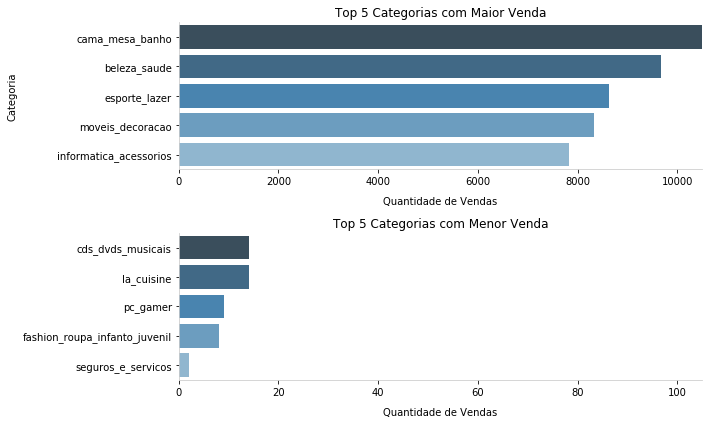

In [33]:
# Quantidade de Vendas
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
plot_param(df=df_qtd_product, col='total_sales', title='Top 5 Categorias com Maior Venda',
           xlim=10500, n_row=0, n_col=0, y='product_category_name', div_xlim=100,
           one_axis=True)
axs[1].set_xlabel('Quantidade de Vendas', labelpad=10)
axs[0].set_xlabel('Quantidade de Vendas', labelpad=10)
axs[0].set_ylabel('Categoria', labelpad=40)
axs[1].set_ylabel('')
plt.tight_layout()
plt.show()

* **Receita Gerada por Categoria**

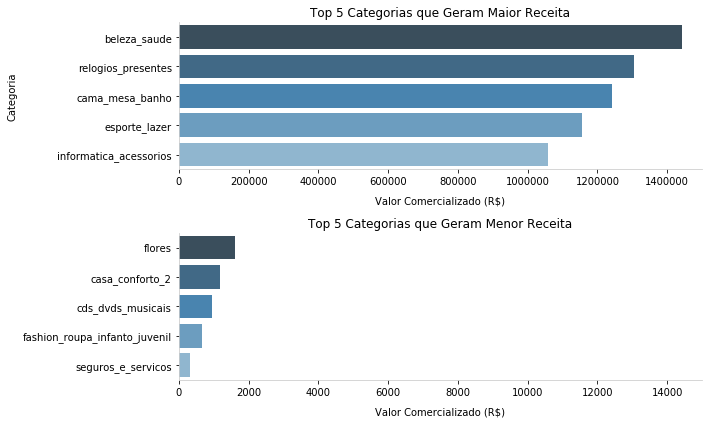

In [34]:
# Valor total de Vendas
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
plot_param(df=df_sales_product, col='total_sales', 
           title='Top 5 Categorias que Geram Maior Receita',
           xlim=1500000, n_row=0, n_col=0, y='product_category_name', div_xlim=100,
           one_axis=True)
axs[1].set_xlabel('Valor Comercializado (R$)', labelpad=10)
axs[0].set_xlabel('Valor Comercializado (R$)', labelpad=10)
axs[0].set_ylabel('Categoria', labelpad=40)
axs[1].set_ylabel('')
plt.tight_layout()
plt.show()

* **Valor Médio de Produtos por Categoria**

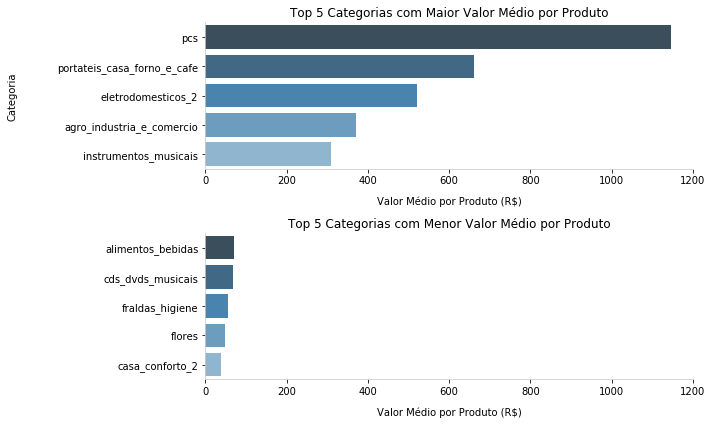

In [35]:
# Valor médio de produto por categoria
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
plot_param(df=df_mean_product, col='total_sales', 
           title='Top 5 Categorias com Maior Valor Médio por Produto',
           xlim=1200, n_row=0, n_col=0, y='product_category_name',
           one_axis=True)
axs[1].set_xlabel('Valor Médio por Produto (R$)', labelpad=10)
axs[0].set_xlabel('Valor Médio por Produto (R$)', labelpad=10)
axs[0].set_ylabel('Categoria', labelpad=40)
axs[1].set_ylabel('')
plt.tight_layout()
plt.show()

### Review Score

* **Distribuição de Scores**

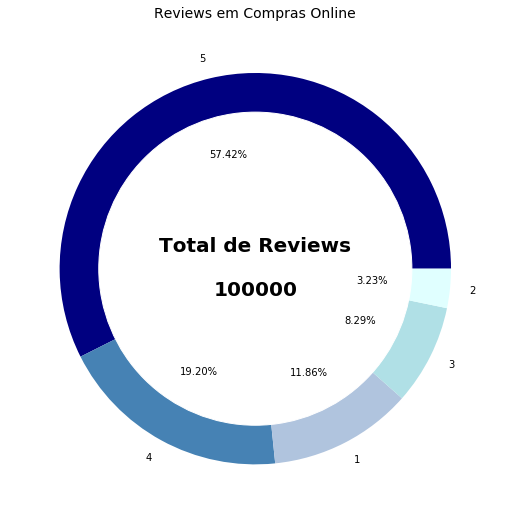

In [36]:
reviews_labels = olist_order_reviews['review_score'].value_counts().index
total_reviews = len(olist_order_reviews)
text = f'Total de Reviews\n\n{total_reviews}'
colors = ['navy', 'steelblue', 'lightsteelblue', 'powderblue', 'lightcyan']
fig, ax = plt.subplots(figsize=(9, 9))
donut_plot('review_score', ax, olist_order_reviews, labels=reviews_labels, text=text, colors=colors)
ax.set_title('Reviews em Compras Online', size=14)

plt.show()

# Processamento de Linguagem Natural

Após uma análise exploratória nos dados, realizada com o objetivo de propor uma familiarização e uma imersão no contexto do problema de negócio a ser resolvido, os próximos passos irão contemplar, de fato, a aplicação de técnicas de Processamento de Linguagem Natural de acordo com o objetivo proposto.

Entre os conjuntos de dados disponibilizados que descrevem fatos sobre o E-Commerce no Brasil, existem informações a respeito de _reviews_ (ou críticas) deixadas por compradores nas plataformas online. O objetivo deste projeto é analisar este dados e propor um algoritmo de classificação de sentimentos para captar como o consumidor se sente a medida que o fluxo de compras via e-commerce ocorre.

## Contato Inicial com o Dataset

Como citado, abaixo encontra-se um exemplo do dataset a ser utilizado.

In [37]:
# Dados com críticas de clientes
olist_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [38]:
# Dimensões
print(f'Este dataset possui {olist_order_reviews.shape[0]} linhas e {olist_order_reviews.shape[1]} colunas.')

Este dataset possui 100000 linhas e 7 colunas.


Informações disponíveis:

* **review_id:** chave primária que identifica a crítica;
* **order_id:** chave estrangeira para conectar ao dataset de pedidos;
* **review_score:** score dado pelo cliente para cada pedido;
* **review_comment_title:** título do comentário deixado pelo cliente;
* **review_comment_message:** comentário/crítica deixada pelo cliente;
* **review_creation_date:** data da criação do comentário;
* **review_answer_timestamp:** data da resposta dada

Já no cabeçalho dos dados, é possível visualizar dados nulos. 

In [39]:
# Dados nulos
olist_order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Os dados nulos presentes concentram-se nas colunas de título e de mensagem da crítica/comentário. É possível que exista uma relação entre ambos, como por exemplo, títulos não existentes estão relacionados a críticas não existentes e vice e versa. Para visualizar essa correlação entre dados nulos, será utilizada a biblioteca [_missigno_](https://github.com/ResidentMario/missingno).

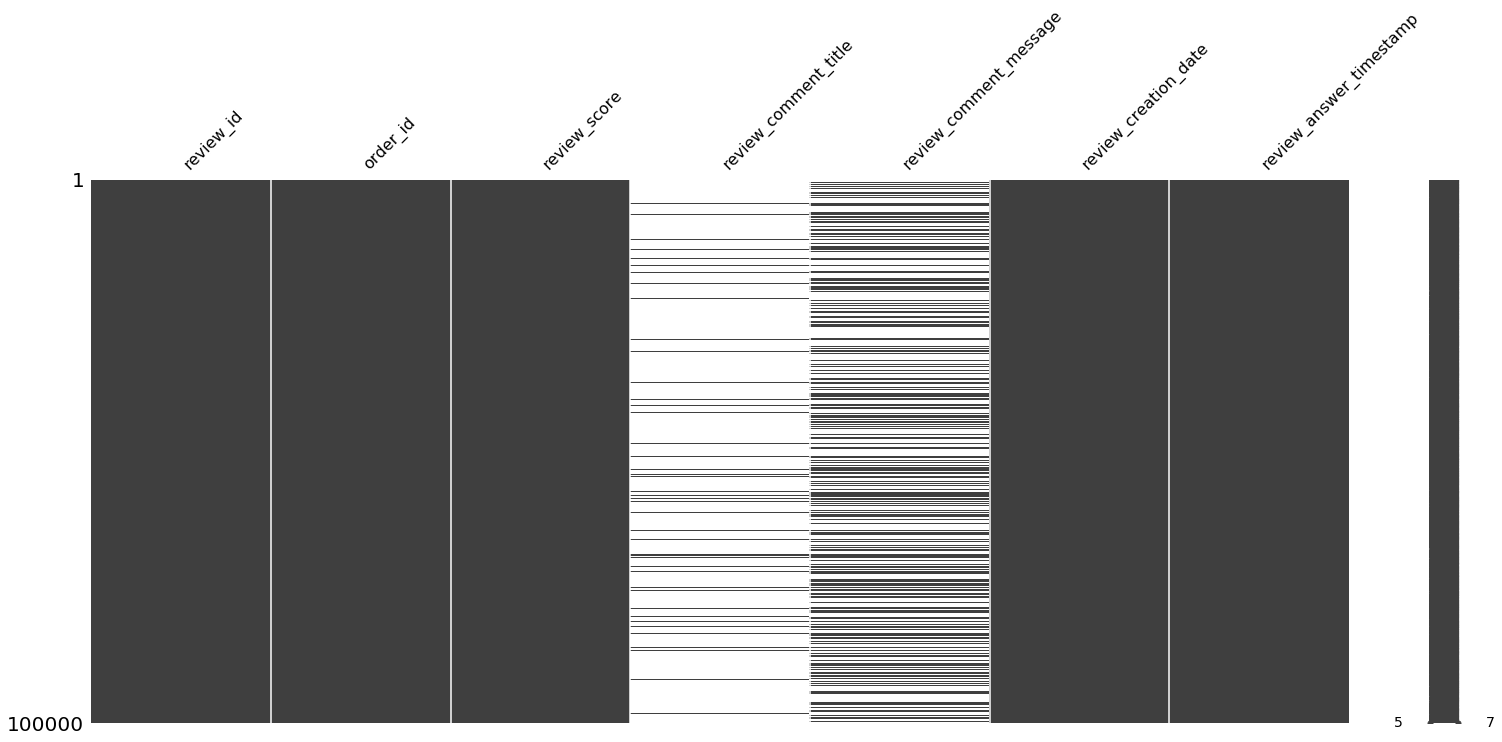

In [40]:
# Correlação entre estes dados nulos
msno.matrix(olist_order_reviews)
plt.show()

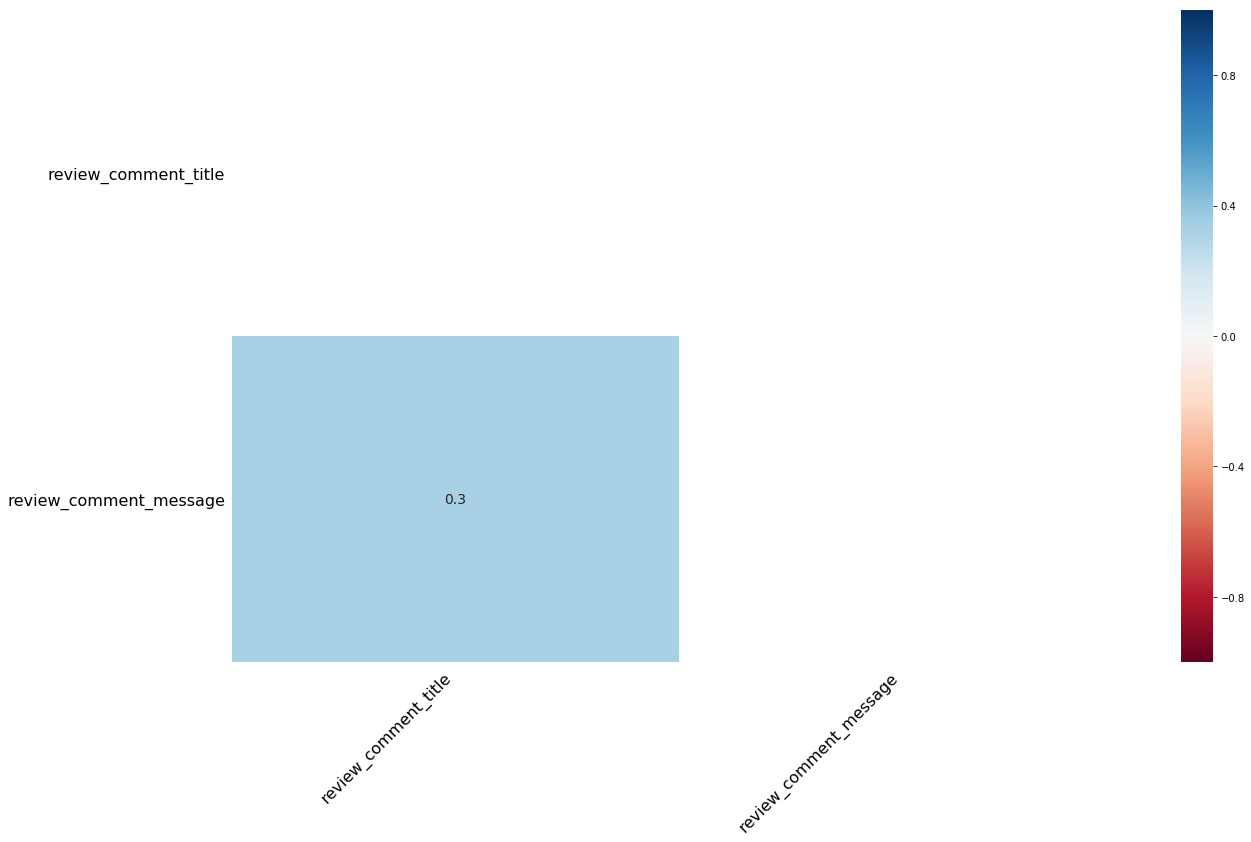

In [41]:
# Correlação entre dados nulos
msno.heatmap(olist_order_reviews)
plt.show()

Realmente a plotagem de correlação de dados nulos mostra que existe uma relação entre críticas nulas com títulos nulos. Levando em consideração os objetivos do projeto, será realizada a remoção de dados nulos da coluna *review_comment_message*.

In [42]:
# Removendo dados nulos
reviews = olist_order_reviews.dropna(subset=['review_comment_message'])
print(f'Restaram {reviews.shape[0]} críticas a serem analisada.')

Restaram 41753 críticas a serem analisada.


In [43]:
# Exemplos
for i in range(5):
    print(f'Crítica {i+1}: {np.random.choice(reviews["review_comment_message"])}')

Crítica 1: Adorei o meu produto, vou aproveitar muito.
Crítica 2: entrega demorada e pouca informação, se o produto for vendido por outro site darei a preferencia
Crítica 3: Indico este site para meu amigos
Crítica 4: Entregou no prazo.
Crítica 5: Produto muito bom


Depois de analisar brevemente o conteúdo a ser trabalhado, é possível dar os primeiros passos para a construção de um modelo de análise de sentimentos. A seguir, será proposta uma análise utilizamos Expressões Regulares a fim de identificar se existem alguns elementos de HTML nas críticas fornecidas pelo dataset.

## RegEx

Pelo fato de se trabalhar com um conteúdo oriundo da internet, é possível que algumas tags HTML, ou mesmo tags de quebra de linha e outros padrões, estejam presentes nos comentários deste dataset. Em um primeiro momento, deve ser feita uma investigação pra confirmar essa hipótese a partir de algumas funcionalidades trazidas pelas Expressões Regulares.

In [44]:
# Verificando um exemplo de comentário
critica = reviews.iloc[3, 4]
critica

'Mas um pouco ,travando...pelo valor ta Boa.\r\n'

Aqui é possível visualizar as tags \r (_carriage return_ código ASCII 10) e \n (_new line_ código ASCII 13). Através de RegEx, é possível procurar este padrão dentro do texto.

In [45]:
# Aplicando expressão
p = re.compile(r'\n')
s = p.search(critica)
print(s)

<re.Match object; span=(44, 45), match='\n'>


O resultado acima mostra que o padrão "\n" foi encontrado nas posições indicadas por `span=(44, 45)`. Será mesmo?

In [46]:
# Confirmando
critica[44]

'\n'

Entretando, podem existir comentários com mais de uma quebra de linha ou outra expressão característica. Exemplo:

In [47]:
# Comentário com mais de uma tag
critica2 = reviews.iloc[48, 4]
critica2

'Estava faltando apenas um produto, eu recebi hoje , muito obrigada!\r\nTudo certo!\r\n\r\nAtt \r\n\r\nElenice.'

Em casos como este, rodar o _search_ da expressão regular criada irá retornar apenas a primeira aparição da expressão procurada.

In [48]:
# Testando
s = p.search(critica2)
print(s)

<re.Match object; span=(68, 69), match='\n'>


Para retornar todas as possíveis posições da expressão procurada, é preciso utilizar o método `finditer()`.

In [49]:
# Retornando todos os resultados
iterator = p.finditer(critica2)
for match in iterator:
    print(match.span())

(68, 69)
(81, 82)
(83, 84)
(89, 90)
(91, 92)


In [50]:
# Testando para todos os comentários
p = re.compile(r'\n')
criticas = list(reviews['review_comment_message'].values)
positions_dict = {}
i = -1
for c in criticas:
    i += 1
    match_list = []
    iterator = p.finditer(c)
    for match in iterator:
        match_list.append(match.span())
    control_key = f'Crítica {i}'
    if len(match_list) == 0:
        pass
    else:
        positions_dict[control_key] = match_list

# Verificando
for k, v in positions_dict.items():
    print(k, v)
    if k[-2:] == '30':
        break

Crítica 3 [(44, 45)]
Crítica 9 [(35, 36), (86, 87), (138, 139)]
Crítica 22 [(46, 47)]
Crítica 25 [(71, 72), (90, 91)]
Crítica 30 [(67, 68)]


In [51]:
# Procurando sites
for c in criticas:
    for f in re.finditer(r'http://', c):
        print(f.group())

http://
http://


In [52]:
# Retornando urls
for c in criticas:
    urls = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', c)
    if len(urls) == 0:
        pass
    else:
        print(f'Crítica: {criticas.index(c)} - Links: {urls}')

Crítica: 10796 - Links: ['http://prntscr.com', 'http://prntscr.com']
Crítica: 12782 - Links: ['https://www.lannister.com.br']


É possível afirmar que existem comentários (apesar de poucos) com alguns links. Provando:

In [53]:
# Primeiro teste
criticas[10796]

'comprei o produto pela cor ilustrada pelo site da loja americana, no site mostra ser preto http://prntscr.com/jkx7hr quando o produto chegou aqui veio todos com a mesma cor, tabaco http://prntscr.com/'

In [54]:
# Segundo teste
criticas[12782]

'Pedi esse: https://www.lannister.com.br/produto/22880118/botox-capilar-selafix-argan-premium-doux-clair-2x1-litro?pfm_carac=doux%20clair&pfm_index=3&pfm_page=search&pfm_pos=grid&pfm_type=search_page%'

Apesar da Expressão Regular ter identificado os sites, ela não pegou o link completo, mas sim apenas a parte principal. Abaixo, será colocada uma nova expressão para coletar o link completo, conforme visto nos exemplos acima.

In [55]:
# Testando outro método
urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 
                  criticas[12782])
if len(urls) == 0:
    pass
else:
    print(f'Crítica 12782:\nLink: {urls}')

Crítica 12782:
Link: ['https://www.lannister.com.br/produto/22880118/botox-capilar-selafix-argan-premium-doux-clair-2x1-litro?pfm_carac=doux%20clair&pfm_index=3&pfm_page=search&pfm_pos=grid&pfm_type=search_page%']


## Stop Words

Nesta etapa do projeto, serão removidas as stopwords através da biblioteca `nltk`, além das pontuações presentes em cada crítica/comentário. Antes, será mostrado um exemplo de comentário antes e após a aplicação da função criada para realizar este procedimento.

In [56]:
# Exemplo
criticas[462]

'Fornecedor targaryen me mandou um massageador completamente diferente do que comprei, de preço inferior e cheio de avaliações negativas. Ninguém erra mandando um superior né, curioso..Ou seja, n recomendo'

In [57]:
# Testando
c = criticas[462]
text_process(c)

['fornecedor',
 'targaryen',
 'mandou',
 'massageador',
 'completamente',
 'diferente',
 'comprei',
 'preço',
 'inferior',
 'cheio',
 'avaliações',
 'negativas',
 'ninguém',
 'erra',
 'mandando',
 'superior',
 'né',
 'curiosoou',
 'n',
 'recomendo']

Realmente a função removeu as pontuações e splitou as palavras, retornando uma lista

In [58]:
# Aplicando transformações ao dataset
processed_reviews = reviews.copy()
processed_reviews['reviews_processed'] = processed_reviews['review_comment_message'].apply(text_process)
processed_reviews['reviews_processed'].head()

3               [recebi, bem, antes, prazo, estipulado]
4     [parabéns, lojas, lannister, adorei, comprar, ...
9     [aparelho, eficiente, site, marca, aparelho, i...
12                [pouco, travandopelo, valor, ta, boa]
15    [vendedor, confiável, produto, ok, entrega, an...
Name: reviews_processed, dtype: object

<b>Output dos datasets

In [74]:
frase =''
texto = ''
f= open("dataset_train.txt","w+")
for i in range(0,int(processed_reviews.shape[0]*0.8)):
    linha = processed_reviews['reviews_processed'].iloc[i]
    for word in linha:
        frase = frase + ' ' +word 
    if int(processed_reviews['review_score'].iloc[i])>3:
        f.write(frase + ' &&- 1 \n')
    else:
        f.write(frase + ' &&- 0 \n')
    frase = ''
f.close() 

In [71]:
frase =''
texto = ''
f= open("dataset_test.txt","w+")
for i in range(int(processed_reviews.shape[0]*0.8)+1,processed_reviews.shape[0]):
    linha = processed_reviews['reviews_processed'].iloc[i]
    for word in linha:
        frase = frase + ' ' +word 
    if int(processed_reviews['review_score'].iloc[i])>3:
        f.write(frase + ' \t 1 \n')
    else:
        f.write(frase + ' \t 0 \n')
    frase = ''
f.close() 

# Naive Bayes classifier

In [3]:
import sys
import re
import math
regex = r"[-'a-zA-ZÀ-ÖØ-öø-ÿ]+" 

In [72]:
class NBClassifier:

    def __init__(self, training_file=None):
        self.Data          = []
        self.Classes       = dict([])
        self.V             = set([])
        self.bigdoc        = dict([])

        self.logprior      = dict([])
        self.loglikelihood = dict([])

        if training_file is not None:
            self.load_data('dataset_train.txt')


    def load_data(self, training_file):
        training_document = open(training_file,'r')

        for line in training_document.readlines():
            d, c = tuple(line.strip().split("&&-"))
            self.Data.append((c,d))

            if c not in self.Classes:
                self.Classes[c] = 0
                self.bigdoc[c] = []
            self.Classes[c] += 1
            
            for w in re.findall(regex, d):
                self.V.add(w)
                self.bigdoc[c].append(w)
        print(self)
        print("Total: classes={} documentos={} vocabulario={}".format(len(self.Classes), len(self.Data), len(self.V) ) )


    def train(self):
        for c in self.Classes:
            Ndoc = len(self.Data)
            Nc   = self.Classes[c]

            self.logprior[c] = math.log(Nc/Ndoc)
            #self.logprior[c]  = Nc/Ndoc

            count_wc = 0
            for w in self.V:
                count_wc += self.bigdoc[c].count(w)

            for w in self.V:
                self.loglikelihood[(w,c)] = math.log( (self.bigdoc[c].count(w) + 1) / (count_wc + len(self.V) )  )
                #self.loglikelihood[(w,c)]  = (self.bigdoc[c].count(w) + 1) / (count_wc + len(self.V) )  

        print("\n", self.logprior)


    def test(self, testdoc):
        s = dict([])
        for c in self.Classes.keys():
            s[c] = self.logprior[c]
            for w in re.findall(regex, testdoc):
                if w in self.V:
                    s[c] += self.loglikelihood[(w,c)]
                    #s[c]  *= self.loglikelihood[(w,c)]

        return max(s, key=s.get)


In [ ]:
if __name__ == '__main__':
    fileName = sys.argv[1]

    NBC = NBClassifier(fileName)
    NBC.train()

    while True:
        phrase = input("\nDigite uma frase: ")
        print("Resposta: {}".format( NBC.test(phrase)) )

<b>Test em cima de base real

In [143]:
df_resposta=pd.DataFrame(columns=['texto','resposta_pred','resposta_real'])

In [146]:
if __name__ == '__main__':
    for i in range(int(processed_reviews.shape[0]*0.8)+1,processed_reviews.shape[0]):
        linha = processed_reviews['reviews_processed'].iloc[i]
        for word in linha:
            frase = frase + ' ' +word 
        if int(processed_reviews['review_score'].iloc[i])>3:
            resp = 1
        else:
            resp = 0     
        df_resposta=df_resposta.append({'texto':frase,'resposta_pred':int(NBC.test(frase)),'resposta_real':int(resp)}, ignore_index=True)   
        frase = ''

 produto bom chego rapido
 1
1
 demora avisar deu problema entrega recebi produto avisaram quase dia receberfoi descontado primeira parcela referente compra
 0
0
 demorado
 0
0
 nao chegou problemas correios
 0
0
 bom dia queria entender quê colocam quê entregue residênciaquê entregue ná agência correios próximasendoquêo frete incluso compra
 0
1
 preço loja ótimo porém opções afiação maiores acompanha parafusos buchas
 1
1
 produto chegou bem embalado entrega rápida
 1
1
 amei colcha
 1
1
 tudo ok
 1
1
 tudo ok
 1
1
 gostei veio bem antes prazo previsto
 1
1
 recomendo compra feita nessa loja ter total respeito responsabilidade clientes
 1
1
 sempre compro lannister
 1
1
 produto chegou antes dia previsto bom ótima qualidade tudo certinho recomendo
 1
1
 excelente
 1
1
 produto recebido ainda montei avaliação visual chegou tudo correto
 1
1
 bem atendido pouco demorado chegar mercadoria
 1
0
 boa experiência
 1
1
 produto ótima decoração deixar ambiente lindo
 1
1
 otima
 1
1
 entrega

 ja problemas lannister 2 vez produto nao entregue estornaram cartao quero saber vai ficar
 0
0
 demos relógio presente neta gostou
 1
1
 embora prazo 14 dias úteis produto comprado dia 0905 veio chegar dia 26 alem chegar super atrasado ainda veio produto errado
 0
0
 produto frágil veio lascado acabou quebrar primeira tentativa uso
 0
0
 tudo funcionando percebi alguns arranhões corpo máquina nada influencie uso valor fiquei frustrado loja
 0
0
 produto chegou bem antes prazo previsto ainda instalei exatamente descrito
 1
1
 avaliar recomendar loja sendo ainda recebi produto
 0
0
 ótima compra chegou bem antes prazo ainda usei fiquei hiper feliz recomendo 👏👏👏👏👏
 1
0
 produto entregue somente metadecomprei dois rolos papel parede entregue somente rolo
 0
0
 luminária linda
 1
1
 empresa cumpriu prazo entrega produto bem embalado
 1
0
 efetuei compra 3 pendentes ocorre recebi pedido incompleto 3 pendentes recebi apenas 2 enviei 2 emails lannister agora obtive nenhum retorno
 0
0
 produt

 vendedor cumpriu anúncio óculos atende esperado
 1
1
 excelente serviço prestado
 1
1
 produto péssima qualidade
 0
0
 loja superou expectativas entregou produto primeiros dias antes final prazo rápido eficiente
 1
1
 comprei adaptar aspirador pó veicular 12v tomada elétrica 110v aspirador funciona
 0
0
 entrega correta
 1
1
 produto veio certo produto veio pintura desgastada vários lugares
 0
0
 achei descrição produto ilusória dizendo cobre leito percal etc parece lençol tão fininho gostei recebi fiquei decepcionada
 0
0
 entregue dentro prazo
 1
1
 colocar lâmpada quebrou parafuso dai colei
 0
0
 cuba veio quebrada efetuo barroca
 0
0
 entrega rápida produto perfeito
 1
1
 fiquei feliz compra atendimento entrega q bem antes previsto tanto q dia incentivei mãe tbm comprar vcs parabéns ganharam fiéis clientes
 1
1
 top
 1
1
 compromisso respeito clientes
 1
1
 encomenda veio errada pedi coisa veio outra totalmente diferente comprei blecaute tapa sol veio cortina plastico vagabunda me

 película ficou bem menor tela celular
 1
0
 sei vi produto chegou pareceu novo manualenfim hora compra verifiquei pq sempre compro nessa loja coisa nova sabia q vendiam coisas usadas
 0
0
 mês fiz compra pagando coisa nao absurdo
 0
0
 produto chegou bastante antescedencia fiquei feliz obrigada
 1
1
 produto chegou prazo defeito pedindo troca reembolso
 0
0
 produto chegou bem embalado antes prazo gostei vendedor
 1
1
 comprei duas peças recebi tudo bem empresas diferentes acho complicado pois peças finalizar enxoval noiva
 0
0
 produto ótima qualidade entretanto site tal produto parecia ser peludo contudo loja produtos recomendados
 1
1
 muita demora
 0
0
 negativo
 1
0
 aguardando entrega
 0
0
 ate agora comprei transformador voltagem 9000 btu nao recebi liguei pra americana atendente falou q ia liga pra transportadora mr retorno dois dias ja passaram prazo
 0
0
 quero resposta apenas
 0
0
 nao recebi produto ainda
 0
0
 comprei walk talk recebi baba eletrônica consigo contato efetu

 fornecedor responsávelproduto bem embalado entrega rápida faz jus boa recomendação
 1
1
 tudo recebido perfeitamente
 1
1
 ótimo
 1
1
 produto original anúncio quero devolver produto estorno pagamento
 0
0
 cumpre oque promete
 1
1
 zero responsabilidade
 0
0
 frequência produto incompatível rede elétrica brasileira mostrado descrição produto antes ser comprado
 0
0
 amei comprar lojas lannister fácil comprar aplicativo pode acompanhar rastreamento espero comprar vezes
 1
1
 comprei recebi nenhuma notícia momento
 0
0
 atendeu super bem todas expectativas bem afiadas veio estojo preto bem organizado bonito
 1
1
 produto chegou quebrado consigo realizar troca site
 0
0
 veio certinho prazo
 1
1
 gostei agilidade entrega qualidade produto
 1
1
 demorou demais entrega produto nao reforçado bonito
 1
0
 nao comprei picadinho p chegar casa picadinho cada dia coisa nao empregada nao quero comprar voces nunca chato
 0
1
 chegou antes esperado
 1
1
 material fragilachei produto melhor
 1
0
 ó

 recebi smartphone faltando componentes caixa lente camera traseira arranhada parece produto usado após trinta dias espera produto vem péssimas condições
 0
0
 chegou simplesmente 8 dias parabéns
 1
1

 1
1
 gostei compra descrição produto quanto material verdadeira burocracia troca prefiri ficar
 0
0
 ótima compra recebi dentro prazo mercadoria pedido recomendo vendedor
 1
1
 gostei
 1
1
 produto chegou tempo previsto google
 1
1
 produto funciona veio errado
 0
0
 produto ótimo entrega deixou desejar
 1
0
 chegou bem antes prazomuito antes
 1
1
 produto entregue antes prazo gostei tábua carne fiquei chateada q bandeja baixo material bom veio pouquinho amassada bom produto
 1
1
 tempo entrega agora recebi produto
 0
0
 produto atendeu espectativas qualidade descrito
 1
1
 entrega super rápida
 1
1
 produto entregue prazo fiz várias reclamações inclusive reclama aki assim veio faltando dois produtos recebi ativador cachos falaram ainda entregaria semana vou aguarda
 0
0
 recomendo
 1
1

 produto ótimo entrega rapida
 1
1
 otimo vendedor
 1
1
 produto chegou antes prazo satisfeito parabens
 1
1
 chegou antes prazo ainda testei aparenta estar tudo ok
 1
1
 produto ótimo entrega super rápida
 1
1
 buscar correios bom produto
 1
1
 entregue antes prazo produto qualidade
 1
1
 produto lindo bom ótima qualidade
 1
1
 recebi cortador salada invés gaiolas
 0
0
 relógio menor esperava desperta alto jeitinho precisava consigo acordar chegou antes prazo 1 mês demorou uns 10 dias chegar
 1
1
 ótimo
 1
1
 relógio lindo entregue antes prazo valeu pena
 1
1
 excelente produto vou comprar
 1
1
 mercadoria passou prazo entrega
 0
0

 1
0
 produto qualidade preço interessante recomendo
 1
1
 tesoura deve estar sendo fabricada agora pq previsão entrega 153 prazo longo comparado co outro produto adquirido dia hj 193 nada
 0
0
 lindo porém toalhas finas
 0
1
 adorei recebi antes prazo
 1
1
 dou 5 estrelas porque ainda recebi outro produto q comprei
 0
0
 chegou antes prazo perfeitas condi

 atraso entrega feedback cliente espero nunca precisar comprar algo nesta loja recomendaria nunca loja medo receber produto indignado
 0
0
 gostei to satisfeito loja produto
 1
1
 produto chegou nenhum problema funcionando normalmente dificuldade pro computador reconhecer precisa instalar nenhum drive
 0
1
 produto entregue mal embalado descrição frágil copos chegaram todos quebrados cacos tentando resolução site telefone baratheon resposta
 0
0
 bom chegou antes prometido
 1
1
 produto péssima qualidadecai todo fiapo pincel tinão recomendo
 0
0
 satisfeito melhor sistema entrega foce correios todos produtos cargo correios causa transtorno ser empresa inconfiável torna insatisfação
 0
1
 produto maravilhoso entrega super rápida
 1
1
 boa entrega recomendo
 1
1
 produto nunca apareceu casa
 0
0
 produto lindissimo adorei
 1
1
 infelizmente embalagem produto chegou violada aguardando reembolso envio restante produto adquirido
 0
0
 chegou direitinho nada quebrado embalagem adequada prote

 tudo ok
 1
1
 produto atende necessidade porém conservação ddeixa desejar
 1
0
 recebi produto dentro prazo produto excelente recomendo todos prático atende bem necessidades uso doméstico
 1
1
 surpreendeu porque recebi produto antecipação dez dias prazo dado entrega agradecer toda equipe obrigado deus abençoe
 1
1
 fiquei triste decepcionado trabalho
 0
0
 gostei produto
 1
1
 entrega rápida antes prazo previsto produto correto parece boa qualidade procuramos hoje falta tempo cuidar coisas casa pretendo comprar colchas
 1
1
 quero produto dinheiro volta
 0
0
 produto chegou demorou
 1
0
 seguro rápido ágil
 1
1
 recomendo
 1
1
 demorada agora recebi produto
 0
0
 entrega rápida
 1
1
 excelente
 1
1
 produtos firenze cosméticos excelentes
 1
1
 entrega rápida produto esperado
 1
1
 deu dois dias pelicula solto qualidade ruim
 0
0
 ótima trabalho
 1
1
 livros bons
 1
1
 recebi pedido tempo estimado informada porque atraso
 0
0
 produto entregue rápido satisfeito
 1
1
 gostei fragrância

 encomenda chegou bem antes prazo certeza comprarei denovo
 1
1
 td ok
 1
1
 produto original entregue prazo certo
 1
1
 produto qualidade chegou antes prazo previsto gostei
 1
1
 produto entregue antes prazo determinado
 1
1
 produtos bem embalados corretos entrega dentro prazo
 1
1
 produto qualidade entregue aves prazo
 1
1
 baratheon produtos lindos ótima qualidadeparabéns sempre
 1
1
 produto chego antes prazo entrega revomendo
 1
1
 recomendo
 1
1
 ok
 1
1
 entrega prazo bom material
 1
1
 sempre comprei lannister otima loja otimos preços parabéns
 1
1
 entrega rápida
 1
1
 comprei capacete branco veio azul
 0
0
 produto bom chegou antes prazo super recomendo atendeu expectativas
 1
1
 entrega prazo combinado porém pedi duas unidades entregaram
 0
1
 produto material resistente porem marca tamanho g achei pequena larga carrinho colocar garrafinha água bolsos laterais acredito arraste
 0
1
 recomendo todos bom
 1
1
 maravilhosotudo queria entrega dia seguinte confirmação compra lo

 atraso entrega dever correios dá loja renda deveria ser firme tecido valeu
 0
1
 produto demorou pouco chegar sei direito funciona logística entrega agora tudo bem
 1
1
 comentários
 1
0
 achando demorado entrega ficaram entregar dia 020218 hoje chegou
 0
1
 lindas assadeiras ótima qualidade recomendo todos
 1
1
 realizada compra porém verificar detalhamento encomenda produto estoque
 0
0
 serviço ótimo demora correio
 1
1
 tudo certo bunito
 1
1
 nao recebi produto
 0
0
 produto entregue atraso esperado produto qualidade
 1
1
 ótimo produto
 1
1
 produto entregue incompleto comprei 2 entregue 1
 0
0
 bom cumprimento prazo deveriam avisar produto viria dois envelopes datas diferentes entrar contato email logo informado
 0
1
 recebido
 1
0
 muita demora atender solicitações demora envio
 0
0
 entrega feita antes prazo
 1
1
 comprei pensando q igual foto chegou totalmente diferente
 0
0
 k
 1
1
 chegou antes previsto tudo certo
 1
1
 desde solucionem problema recomendaria pq consta prod

 tudo ok
 1
1
 boa entregaapesar rastreio falho
 0
1
 tudo perfeito
 1
1
 fone original lg veio faltando componentes avaliei estrela porque sistema aceita zerar
 0
0
 fiz boa compra entregue antes prazo
 1
1
 fiz pedido duas lumimarias recebi
 0
0
 pedido cancelado falta estoque recebi produto cobrança ainda fatura estorno quero solução
 0
0
 informações claras prasos dentro esperado
 1
1
 frete deveria ser inferior ai produto
 0
1
 perfeito
 1
1
 enganado stark agora querem pague algo entregue golpistas aqui faz aqui paga dia vão pagar maldade
 0
0
 gostei recomendo pra todos quiser comprar confiança cumpre promete
 1
1
 perfeito cores vivas simplismente ameei
 1
1
 bolsa linda espaçosa show bola adorei
 1
1
 entrega antes prazo
 1
0
 entregue prazo tudo certinho nota 10
 1
1
 sempre compro recomendo ótima
 1
1
 endereço correto porteiro 24h entregaram produto
 1
0
 presente momento n entregue verdade nota fiscal entreguecancelei pedido
 0
0
 fonte veio diferente anunciado
 0
0
 tudo 

 fiz 3 compras nesse dia parceiros diferentes porém restante chegou
 0
0
 bom
 1
1
 produto bem embalado chego bem antes prazo
 1
1
 tanto loja quanto vendedor lixeira bom recomendo tudoentrega super rápido chegou antes prazoamei tudo
 1
1
 mercadoria entregue lamentável
 0
0
 demorou pouco pra chegar embalagem precária produto ainda testei correto
 1
1
 veio certinho demorou latinha veio pouco amassadinha gostei pigmentação tinta
 1
1
 prazo entrega 9 dias chegou 2o
 1
1
 pedindo cancelamento mesma hora compra insistiram entregar neguei recebimento correio devolvi
 0
0
 recebi produto antes prazo
 1
1
 adorei
 1
1
 ruim demora entrega transportadora valor rápido entrega
 0
0
 boa tarde recebi outras duas calculadoras dois dias tudo ok obrigado
 1
1
 recomendo todos produto bom entrega rápida
 1
1
 tudo imaginei tudo correto
 1
1
 excelente
 1
1
 gostaria enviassem novo produto porque roubado queria ficar
 0
1
 parabéns satisfeita
 1
1
 compra nao chegou
 0
0
 produto atendeu expectati

 princípio fiquei preocupado longo prazo entrega dias úteis porém chegou pouco antes
 1
1
 gostei pruduro emtrega dentro prazo
 1
1
 produto entregue antes prazo
 1
1
 produto entregue compreie ainda veio defeito parte lateral direita veio aberta volume sobe sozinho segurar controle conseguindo reimbo
 0
0
 produto top
 1
1
 chegou antes previstoparabens responsáveis logística entrega
 1
1
 entregue muita rapidez fiquei satisfeita
 1
1
 bom
 1
1
 produto qualidade achei cor azul verde fiquei satisfeita produto obrigada
 1
1
 comprei 5 lustre pendente enviaram 3
 0
0
 produto recebi diferente produto anunciado
 0
0
 nota 10
 1
1
 comprei dois cartuchos tinta preta xl dia 0902 pq precisando recebi dia 1003 apenas cartucho nota fiscal veio 02 cartuchos faturados quero ver vai ac
 0
0
 infelizmente demorou pouco chegar
 0
0
 controle bom demora entrega poderiam entregar menos dias dentro prazo
 1
1
 produto nao chegou nao recebi informacao suficiente sobre andamento entrega
 0
0
 bom
 1
0


 gostei compra
 1
0
 denis
 1
1
 rodo mágico bom centrifuga seca esfregão conforme necessidade menos umido satisfeita compra
 1
1
 comprei luminárias entregue
 0
0
 enviei mail comunicando q produto defeito solicitando reembolso agora aguardando resposta
 0
0
 bom
 1
1
 recebi produto loja sabe onde encontra produto péssimo atendimento sac lannister
 0
0
 perfeito super recomendo
 1
1
 cabo excelente qualidade chegou dentro prazo
 1
1
 ainda recebi
 0
0
 produto comprei lannister recebi duas extensões cabo hdi
 0
0
 recebi antes prazo
 1
1
 produto bonito tecido bom veio rasgado parte costura modo geral ok preço
 1
0
 primeira vez comprei lannister online agora trocarei ml lannistercom
 0
1
 rastreio falhoproduto ficou parado postagem
 0
0
 bom
 1
1
 bom
 1
0
 prazo entrega longo demorou bastante
 1
1
 produto veio quebrado entrei contato empresa super bem atendida imediatamente resolveram tudo mandaram outro novinho obrigada atendimento atenção atendente bruna
 0
1
 bom
 1
1
 surpresa

 adquiri produto através lannistercom 02032018 data recebi produto
 0
0
 ótimo chegou bem antes prazo
 1
1
 cadeira fica parafuso machucando nadegas comprem arrependimentototal
 0
0
 produto entregue acordo prazo combinado
 1
1
 entrega antes prazo único problema cobrar frete retirada produto correio entregam casa
 1
1
 cabo bom
 1
1
 podem comprar confiança
 1
1
 ruim entrega correios site constava 3 tentativas entrega correios deixarem nenhum aviso entrega caixa correio
 0
1
 tudo ordem
 1
1
 vou ver produto prometem
 1
1
 achei excelente
 1
1
 tudo certo produto bem poderia vir embrulhado pra chamar atenção
 1
1
 porém grande pra passeio ótimas agora pra levar maior pra maternidade cabe muitas coisas
 0
1
 gostaria saber vou receber sim prazo
 0
0
 ocorreu tudo bem
 1
1
 recebi produto condições prazo combin adorecomendo fornecedor
 1
1
 produto ótimoentrega prazoadoreiiii
 1
1
 recebi produto rapidamente enviado sedex recebi primeiro dia útil posterior compra recomendo muitíssimo
 

 comprei atentei fone apenas pensei parveio apenas lado fone tudo blz
 0
1
 produto incorreto alem vim trocado veio valor menor comprei kit anny casal 5 peças fronhas forma coração corcáqui veio colcha casal anne 5 peças bordada
 0
0
 produto chegou
 1
0
 recedi produto modelo diferente comprei
 0
0
 01 gf vazia 11 gfs vazando ano passado fiz compra veio 03 quebradasnão confio
 0
0
 cortina linda boa qualidade ainda estalei ja vi vai resolver problema luz brindex
 0
1
 recebi outro produto pois oque comprei nao consta estoque assim nao tiraram site
 0
0
 ótimo produto superou expectativas
 1
1
 acho frete poderia ser menir gratis aparece comprando vai finalizar compra entra facada frete
 0
1
 produto chegou bem antes prazo final quase compro porque ia demorar demais interessante ajustar pra entrega sei segurança tá exagerado
 1
1
 funcionou perfeitamente
 1
0
 recomendo cancelei compra cobrada obtive nenhum retorno loja quero devolver receber extorno
 0
0
 entrega chegou antes prazo pa

 recebemos somente 02 cadeiras
 0
0
 recomendo demais
 1
0
 produto nao entregue comprei dois veio somente
 0
0
 gostei facilidade
 1
1
 excelente vendedor recomendo
 1
1
 recebi recomendo produto
 1
1
 bonita pratica porém tampa churrasqueira pesada corpo trava tampa funciona peso tompa alças grelha vieram amassadas tambem fracas
 0
0
 ótimo produto chegou antes prazo
 1
1
 produto entreguem atraso nenhuma satisfação quanto ocorrido
 0
0
 mercadoria entregue prazo veio capinha película porém película veio totalmente quebrada
 0
0
 recomendo cor linda gostei chegou antes prazo
 1
1
 recebi tudo receber agora gostaria parar receber spawn loja lannister ficou chato todos dias aparecer coisa interesso caixa mensagem
 0
0
 excelente mercadoria mt bem embalado
 1
1
 produto qualidade
 1
1
 compra dividida 3 partes referente produto entregue alegando estar endereço errado sendo outros duas entregues endereço prazo expirou
 0
0
 produto chegou bem antes prazo adorei aparelho trabalhinho deixa

 recebi td certinho boa qualidade
 1
1
 consigo contato saber notícias produto
 0
0
 recomendo loja pois vendeu mochila q estoque
 0
0
 recebi produto encomendei dentro prazo anunciado
 1
1
 produto veio defeito funciona
 0
0
 bom
 1
1
 loja entrega produtos comprados 20 dias diz precisa 20 dias nota zero
 0
0
 ainda recebi produto gostaria saber motivo demora
 0
0
 entrega rápida bom produto fácil montagem
 1
1
 brinquedo chegou bem antes prazo
 1
0
 exelente
 1
1
 excelente
 1
1
 outro produto deveria vir junto menos mesma época
 0
1
 bom
 1
1
 cartucho parece igualcompatível encaixa perfeito máquina conferi pedido códigos corretos falha encaixe sorte encaixou noutra máquina usa tipo
 0
0
 gostei compra site bom
 1
1
 preciso devolver 1 pedidos pedir engano
 0
1
 entregue antesdo previsto
 1
1
 informo recebi produto insatisfeita
 0
0
 recebi produto debitado cartão
 0
0
 entrega realizada antes prazo previsto produto atendeu expectativas super indico loja
 1
1
 produto entregue ante

 rápido
 1
1
 indico loja produto entregue prazo burocracia
 1
1
 bom comprar loja confiável
 1
1
 recomendo loja pois cumpriu pactuado
 1
1
 produto chego antes prazo entrega notei caixa bem danificada vou poder reotilizar caixa guarda produto pena porque embalagem bem bonita
 1
1
 espetacular
 1
1
 entregue prazo certo
 1
1
 gostei produto veio exatamente imagem bem grande preço bom recomendaria troca rolamento melhor comprarem
 1
1
 produto ótimo entrega loja targaryen maravilhosa
 1
1
 produto entregue bem antes prazo bom indico
 1
1
 rewcomendo loja
 1
1
 entrega rápida tudo lindo perfeito
 1
1
 bonito ótimo custo benefício veio algumas costuras soltas
 1
0
 esclareço entrega veio incompleta faltando 01 capa chuva solicito providências
 0
0
 produto veio mal lacrado derrubou tinta tudo
 1
0
 recebi produto errado pedi devolução faz muitos dias porém ninguém respondeu hoje agr produto errado
 0
0
 recebi produto agora
 0
0
 nada declarar enquanto
 0
1
 gostei jeito foto
 1
1
 gosto

 quero devolução
 0
0
 pedido cancelado
 0
0
 produto excelente chegou prazo perfeito
 1
1
 jah conhecia marca pois adquirido whey chocolate bom sinal contudo morango ridiculo ruim péssima fórmula gosto ruim dilui fudendo
 0
0
 relógio pingente coruja veio defeito
 0
0
 esperava q produto pouco melhor
 1
1
 produto entregue prazo
 1
1
 entrega super rápida
 1
1
 único problema ainda recebi produto
 0
0
 prazo entrega bom mercadoria chegou acordo venda
 1
1
 recebi somente toner cor ciano toner hp 311a ce311a cyan original serie 126a amarelo recebi
 0
0
 produto baixa qualidade chinês camelo custa 50 valor pago achei produto americano
 0
0
 gostei produto chegou antes prazo
 1
1
 loja ótima sempre comprei chegou antes prazo apenas produto atrasado
 1
1
 veio tudo certinho anuncio relogio bonito
 1
1
 boa informação pós compra saber andamento entrega programada
 0
1
 bom
 1
1
 caixa produto chegou amassada correios informaram q vendedor nao optou embalagem apropriada deveria responder pr

 gosto desse site primeira vez produto veio errado creio jã providenciando troca
 0
1
 otimo produto
 1
1
 recomendo
 1
1
 amei produto super recomendo
 1
1
 produto entregue prazo ótimas condições
 1
1
 sinceramente recomendaria porque produto chegou metade cadê empresária nada sexy autora deby incour mudarei opinião livro
 0
0
 tanto vendedor loja excelentes gosto comprar baratheonr
 1
1
 produto chegou antes prazo
 1
1
 duas embalagens vieram amassadas quase devolvi pedido compro desta loja
 0
0
 chegou ok
 1
1
 bom atendimento sempre
 1
1
 show
 1
1
 entrega bem rápida achei bom atendimento
 1
1
 ótimo excelente recomendo todos
 1
1
 produto caro qualidade precária plástico horrível mole descrição informassem plástico compraria compensa valor
 0
0
 entrega rápida
 1
0
 produto entregue resposta
 0
0
 obrigada bom
 1
1
 chegou antes prazo previsto entrega material excelente nao faz barulho apertar mudar canal ainda enviaram 4 pilhas controle amei obrigada
 1
1
 produto entregue mome

 problema correios q devolveram encomenda p salvador levou dobro tempo
 0
0
 mochila linda consideravelmente grande parte maior cabe notebook vários cadernos além disso bolsos menores colocar vários objetos satisfeita aquisição
 1
1
 atendeu expectativas necessidade momento
 1
1
 péssima qualidade produto cobre leito parecendo lençol babado comprei cobre leito baratheon parecia quase edredom vcs deveriam escolher melhor logistas participantes
 0
0
 crítica quanto entrega efetuei pagamento frete ir buscar produto correios tendo pagar passagem tanto
 0
0
 insatisfação total loja vende produto entrega tremenda falta respeito
 0
0
 problema correios
 0
1
 ótimook
 1
1
 quero produto
 0
0
 entrega super rápida
 1
1
 aguardando encomenda recebi aviso dificuldade entrega ninguém entrou contato dizer q realmente aconteceu
 0
0
 super recomendo
 1
1
 entregue dentro prazo direitinho acho defeito pq coloquei p carregar noite ineira funcionou queria saber trocar
 0
1
 ótimo produto entrega prazo 

 entrega super atenciosos entrega antes previsto
 1
1
 bom acabamento excelente atendimento
 1
1
 previsão entrega 121217 momento entregue
 0
0
 mto bom
 1
1
 recebi produto ainda
 0
0
 loja ágil envio produto produto superou expectativas
 1
1
 pontualidade
 1
0
 estao parabens
 1
1
 entrega antes prazoperfeito
 1
1
 chegou antes prazo
 1
1
 boa experiencia
 1
1
 recomendo todos comprar nesta loja atendimento prazo entrega conforme indicado parabéns
 1
1
 ainda vou avaliar realmente original peugeot conforme anunciado att
 0
1
 ótimo
 1
1
 gostei produto exatamente imaginei entrega dentro prazo unica reclamação q s problemas c compra precisar entrar contato rápido c empresa esquece q n consegue
 0
0
 boneco bommas pouco pesado criança 23 anos fiz devolução pq vi outro barato
 0
0
 ameeei
 1
1
 compromisso
 1
1
 recebi produto errado
 0
0
 compro sempre atraves baratheon nunca problemas
 1
1
 falta protetor impermeavel
 0
0
 mercadoria veio bem embalada tratar filtro barrro parabéns bom

 chegou prazo produto bom
 1
1
 recebi produto ia retirar hj
 0
0
 produto entregue prazo
 1
1
 entregaram hoje alegando mercadoria roubada
 0
0
 excelente produto chegou antes previsto satisfeita produto
 1
1
 insacisfeito
 1
0
 tapete macio peludo qualidade excelente cor igual foto superou expectativas
 1
1
 produto útil entregue antes prazo recomendo vendedor
 1
1
 segundo produto compro lannistercom chega antes prazo muita qualidade maca chegou perfeito estado qualidade indiscutível
 1
1
 recomendo totalmente
 1
1
 comprei lannister produto entregue prazo deste parceiro targaryen atrasado
 0
0
 produto atraso causa greve caminhoneiros pois comprei outro produto igual outra loja recebi
 0
0
 produto correto bem embalado chegou dentro prazo recomendo
 1
1
 produto entregue dentro prazo conforme anúncio recomendo
 1
1
 ótimo super recomendo produto conforme descrição
 1
1
 entregue antes prazo tudo ok excelente
 1
1
 achei demorado entrega msm estando dentro prazo dia 0201 postado sul

 recebi apenas item pedido notafiscal corretatambém apenas item outro item aconteceu sei nada
 0
0
 recebemos produto dentro prazo recebemos qualquer comunicado avisando atraso
 0
0
 entregaram prazo produto correto
 1
1
 tudo certo
 1
0
 produto ainda usado primeiro teste dentro esperado prazo entrega excelente chegou antes previsto
 1
1
 realizo compras 7 anos sempre bom atendimento
 1
1
 compra paga recebe dentro prazo recomendo
 1
1
 produto entregue antes prazo estabelecido deixou apenas desejar relação características produto espera cortina espessa voltaria comprar item
 1
0
 bom
 1
1
 recebi produto nenhuma satisfação aguardo contato
 0
0
 comprei achando ser vermelha veio rosa negativo
 0
1
 comprei paguei dois produtos iguais recebi
 0
0
 comprei dois produtos distintos targaryen stark ambos dificuldade entrega rastreamento atualiza semanas
 0
0
 pedi cor l2 recebi cor l3 estoque avisar cliente gostaria esperar cancelar pedido agora peço realizar devolução resposta
 0
0
 pagam

 produto bom entrega rápida parabéns
 1
1
 bonito porém vinhedo quebrada
 1
0
 entregou antes prazo produto bom poden comprar
 1
1
 tentaram entregar endereço errado voltou remetente ficou disponivel pra retirar outra cidade aí retiraram nenhuma informação preferi cancelartargaryen nunca
 0
0
 produto altíssima qualidade designer arrojado
 1
1
 filtro chegou quebrado vendedor atencioso prontamente enviou outro recomendo loja
 1
1
 quadro lindo entrega prazo
 1
1
 produto bom gostei porque anúncio diz bobina cobre alumínio levar verdade certo
 0
1
 boa logistica empresa produto dentro caracteristicas
 1
1
 bom
 1
1
 produto defeito
 0
0
 produto entregue dentro prazo entanto adesivo caneca veio dois pequenos furos comprometeu satisfação compra
 0
0
 entrega super rápida obrigada
 1
1
 hora compra encontrei especificações material agora chegou achei fraco
 1
0
 ok
 1
1
 produto chegou prazoporem nao veio medida correta tentei entrar contato troca devolucao nao obtive nenhuma resposta
 0


 produto tão confortável pensei q ajustasse confortavelmente cabeça trapézio amolda tão bem assim
 1
0
 excelente produto
 1
1
 pedido chegou preciso desse produto semana vem
 0
0
 produto enviado rapidamente chegou bem embalado agradeço recomendo
 1
1
 tudo otimo
 1
1
 outras lojas dando suporte comunicação rápido entrega ágil
 1
0
 bom produto atendeu expectativas
 1
1
 trabalha kit tesouras fio navalha chego quero receber cliente tanto tempo acontece comigo vai ficar cituaçao
 0
0
 produto bom recomendo
 1
1
 produto ótimo chegou bem antes prazo
 1
1
 entrega antes prazo
 1
1
 primeira vez recebo produto
 0
0
 passou prazo porém momento realizada entrega
 0
0
 recebi produto preciso urgentemente posição
 0
0
 sei produto ótima qualidade pq marca deixa desejar avaliar pois ainda chagou
 0
0
 lâminas vieram embalagem enrolados saquinho produto chegou dentro prazo previsto
 1
0
 so recebi desktop nota fiscal vieram 2 medo nao entregarem
 0
0
 ja solicitei troca produto comprei erradoes

 além entregaremnão avisada reembolsada
 0
0
 nosssaaaaaaa superou toooodaas ás espectativas liiiiiindooooooo
 1
1
 loja postou bem rápido embalagem simples encomenda bem protegido dentro caixa correio atrasou entrega
 1
1
 comprei perfume esposa produto chegou agora falsificado claramente sinto enganado lannistercombr vendendo produto falso
 0
0
 bom dia triste decepcionado stark consegui dar presente natal filha carrinho veio defeito aguardei mai 30 dias receber novo carrin
 0
0
 produto jeito site
 1
1
 parabéns entrega super rápida produto perfeitas condições recomendo
 1
1
 tudo ok produto entregue prazo
 1
1
 produto bom boa compressão confortável recomendo
 1
1
 gostei lindo
 1
1
 entrega rápida chegou bem embalado produto multiuso serve tonificar massagear lixar
 1
1
 gostaria saber chega produto
 0
0
 gostei produto parece foto
 1
0
 produto bom senti frio mesma maneira
 1
0
 ótimo produto
 1
1
 entrega rápida bem embalada produto correto
 1
1
 momento recebi produto status co

 sempre comprei lojas america primeira vez aconteça demora entrega
 0
0
 recebí produtos faltando tabua bule
 0
0
 paguei mop giratório cod 7824 entregaram mop cod 8210 qualidade inferior quero cancelar compra
 0
0
 chegou certinholo esperava produto bom godtei
 1
1
 entrega rápida melhor previsto super recomendo
 1
1
 ficou lindo quarto filha
 1
1
 preciso óleo fortalecer sistema imunológico
 0
1
 produto ainda chegou
 1
0
 tudo ruim ninguém possamos fazer reclamação entrega produto ouvidoria reclamações nenhum pessypara informar demora entrega
 0
0
 comprei madrugada chegou dia muita eficienciamerece 10 estrelas
 0
1
 aguardando entrega produto
 0
0
 bom produtor
 1
1
 comprei dois kits entregue 1 preciso retorno urgente
 0
1
 bom
 1
1
 gostei produtos entregue perfeitas condiçoes
 1
1
 aguardando contato stark pois comprei 4 produtos recebi 3
 0
0
 boa tarde quero troca produto imediatamente
 0
0
 comprei duas mochilas recebi somente produto valor cobrando dois produtos queto devolu

 meio pedido veio faltando boa parte perças tentando entrar contato loja nao consigo
 0
0
 parabéns
 1
1
 demora tirar nota fiscal retorno situação compra
 0
0
 lindo veio correto faltou ser pouco maior
 1
0
 produto bom filha adorou material pouco frágil atende
 1
1

 1
1
 super recomendo
 1
1
 produto melhor esperado demorou demais presente acabei dando atrasado
 0
1
 produto chegou adequadamente bem embalado parece boa qualidade expectativa começar usar comprovar qualidade
 1
1
 posso dar opinião porque produto recebi funciona culpa targaryen sim culpa fabricante produto vêse claramente péssima qualidade
 0
0
 amei produto chegou rapidinho
 1
1
 produto entregue enviada nota fiscal telefone reclamação funciona
 0
0
 tudo correto produto correto prazo ok
 1
1
 entregue datarecomendo venda produtos
 0
1
 feliz
 1
1
 chegou antes prazo excelente
 1
1
 filha amou
 1
1
 entregaram antes prazo estipulado
 1
1
 mês q compra aprovada hoje n chegou pode coisa dessa
 0
0
 produto boa qualidad

 produto ótima qualidade entrega rápida
 1
1
 produto chegou antes prazo
 1
1
 bom super rapido
 1
1
 produto recebido diferente inferior adquiridonão confere especificações anunciadas
 0
0
 ainda fase experimental porém sinto efeitos ando cansado
 0
1
 produto entregue dentro prazo gostei
 1
1
 entregou antes data previstaestou satisfeito produto
 1
1
 produto entregue
 1
0
 faltou produto
 1
1
 bom adorei
 1
1
 nota tô favorecendo
 0
0
 recebi produto hoje
 0
0
 adorei produto tudo certo entregue conforme esperado respectivas letras certasobrigada
 1
1
 produto errado
 0
0
 apenas observação descrição produto disse q 100algodão q recebi 80 algodão somente 20poliester senti enganada compraria novamente
 0
0
 vez compro parceiros lannistercom recebo produto terceiro parceiro seguido descaso lannister parceiros mercado livre acontece
 0
0
 recebi produto antes prazo adorei bom
 1
1
 material fraco
 1
0
 produto enviado ótima qualidade loja cumpriu atendeu expectativas
 1
1
 opinião
 0
0

 bom custo x benefício
 1
1
 entrega atraso acho conta correios ainda recebi produto
 0
0
 empresa super responsável podemos confiar
 1
1
 serviço péssimo
 0
0
 entrega antes esperado
 1
1
 começo fiquei dúvida falar ser microfibrae consegui nada explicações internetarrisquei dei bem comprei duas recomendo
 0
1
 grávida muita expectativa produto chegar antes nascimento domeu filho poder arrumar berço produto chegou decepcionada
 0
1
 boa compra bem conta comparando outras lojas chegou super rápido recomendo
 1
1
 anuncio gn poduto disponivel glp trocar junto loja comunicaçao deu certo percalços especial loja vendeu diferente aparece site
 0
1
 produto ótima qualidade
 1
1
 super práticafácil limpar ocupa pouco espaço recomendo todos
 1
1
 entrega atraso
 0
0
 péssima qualidade estarei devolvendo produto
 0
0
 comprei vários produtos amazoncom dia somente dois entregues ainda aspirador carro portátil
 0
0
 material produto podia ser pior plástico parece produto hospitalar qdo comprei ac

 gostei correta eficiente todos trabalhace desta forma perfeito pois haveria tantas reclamações porque procuramos meios porque maneira torna visível sim
 1
1
 entregue apenas parte pedido
 0
0
 produto entregue quebrado preciso abrir embalagem perceber nao embalado corretamente
 0
0
 otima forma vendas confiança loja proporciona
 1
1
 carteira linda porém grande padrão carteiras tradicionais
 1
0
 gostei produto ótimo
 1
1
 nunca problema
 0
1
 produto entregue bem antes prazo determinado
 1
1
 otimo
 1
1
 gostei produto
 1
0
 chegou data certa produto bom
 1
1
 entrega antes data prevista
 1
1
 ótima loja super rápida entrega
 1
1
 ótimo
 1
1
 impressora veio proteções completas faltava espuma sólida manter impressora firme dentro embalagem cartucho preto seco comprar outro
 0
0
 comprei dois pares luvas recebi par
 0
0
 parabénscontinuem assim
 1
1
 mercadoria entregue prazo recomendo todos
 1
1
 serviço entrega eficiente produto chegou menos metade prazo limite
 1
1
 primeira vez re

 usar bônus troca comprar produto verdade queria ter recebido produto havia comprado originalmente sempre lannister deu golpe black frid
 0
0
 recomendo stark outras pessoas
 1
1
 comprei duas luminárias amarela outra vermelha chegou amarela faltando entregar vermelha status pedido tá entregue quero ficar prejuízo
 0
0
 produto novo vem caixa recomendo
 1
1
 comprei duas unidades apenas entregue
 0
0
 produto tamanho bom cor linda melhorar qualidade costura problema coloquei lençol ajustar colchão parte costura esgarçou menos 10cm
 0
0
 venho somente produto 4
 0
0
 recomendo sempre fico satisfeito compras baratheon
 1
1
 recomendo tudo avaliaçao
 1
1
 produto entregue bem antes prazo muita qualidade espelho espelho adesivo deixa cara torta muitos outros deste tipo aí fiquei satisfeita
 1
1
 gostaria saber fazer pois entregue
 0
0
 recebemos quatro cadeiras falta cadeira ser entregue conforme pedido
 0
0
 produto menor quer mostra fotos
 0
0
 adorei tapete felpudo bom acabamento
 1
1
 

 achei ótimo demorar 20 dias chegou 4 dias pedido aprovado ainda testei dizem maravilhoso
 1
1
 boa top
 1
1
 recebi produto antes prazo recomendo todos comprar dessa loja
 1
1
 recebi produto combinado dentro prazo
 1
1
 produto todo lambuzado dentro caixa
 1
0
 recebi produto antes previsto td ordem recomendo
 1
1
 produto bom entrega rápida recomendo voltarei comprar
 1
1
 entregou prazo certo obrigado
 1
1
 tapete lindo solta pêlo antiderrapante
 1
1
 bom produto
 1
0
 dor cabeça pegar produtopos transportadora repassou correios protocolo correios saber aond estarem local retirar
 0
0
 entregue antes prazo excelente
 1
1
 gostei bastante produto loja profissional mandou bem embalado gostei bastante parabéns
 1
1
 super rapido
 1
1
 achei frete caro demorou p chegar queria ter entregue diados pais chegou terça dia 15
 0
0
 produto bom recomendo
 1
1
 cumpriu prazo enviou produtos exibidos recomendo
 1
1
 efetuei compra passou data provável entrega momento recebi produto parecer loja

 produto boa qualidade entrega prazo
 1
1
 recebi produto
 0
0
 três dias funciona perfeitamente posso dizer
 1
1
 boa entrega chegou prazo mercadoria correta
 1
1
 produto original chegou prazo bem embalado recomendo
 1
1
 ótimo atendimento ótimo preço entrega antes prazo principais eixos comerciais
 1
1
 ameisuperou expectivas produto qualidade entrega rápida
 1
1
 bom
 1
1
 fiquei satisfeito pois comprei capa celular enviaram ainda pelicula achei boa ideia
 0
1
 recomendo recebi produto comprei mandaram outro produto ninguém resolve lixo loja comprem desrespeito consumidor nunca vou comprar nesta loja
 0
0
 ótimo produto entregue ante prazo
 1
0
 fiz pedido dia 1003 dia 1403 contatada vendedor dizendo sabor escolhido falta escolhi outro sabor hoje 3003 ainda recebi produto decepção total
 0
0
 preciso saber data entregue
 0
0
 lindo grande brilhante excelente qualidade sempre chegou bem antes prazosuper recomendo
 1
1
 maravilhoso paninho ótima qualidade todos lindos
 1
1
 fiz uso p

 bom
 1
1
 excelente produto suporte pós venda maravilhoso
 1
1
 produto bom rápido entrega super indico
 1
1
 super rápido entrega problema algum
 1
1
 prezados bom dia compramos cadeira lannister porém entregues duas unidades gentileza verificar aguardo vanessa melo telefone 41535962
 0
0
 comprei dois produtos iguais pagar frete separado pra piorar umas encomendas retornaou sei vou fazer receber encomenda recomendo empresa
 0
0
 quadros lindos amei chegou antes prazo dei 5 estrelas pois veio defeito moldura embaixo
 1
1
 entendo voces deveriam informar produtos serao entregues varias remessas trata objeto
 0
1
 entrega antes prazo
 1
1
 adorei
 1
1
 ótimo produto entregue prazo
 1
0
 achei tamanho grande média devia deixar explícito
 0
1
 ótimo produto ótimo vendedor
 1
1
 ótimo produto
 1
1
 achei demorou pra chegar pq alguns produtos comprei chegaram antes
 0
1
 devido irresponsabilidade empresa produto chegou residência aguardando informações empresa responsável obs mês fiz compr

 encomenda estagnou unidade cajamar correios outras encomendas outtos siyes paradas tempo cajamar
 0
0
 primeira vez produto chega prazo
 1
0
 recebi produto comprei
 0
0
 produto entregue ainda correios último rastreio ainda ta florianópolis sc enviado local errado cidade certa salvador entrei contato vcs pedira
 0
0
 comprei duas luminárias veio cada caixa escrito frágil caixa amassou luminária tava certinho então tudo ótimo outra luminária quebrada
 0
0
 recebi produto pedi dentro prazo satisfeito
 1
1
 veio mercadoria errada tamanho maior solicitado fazer regularizar
 0
0
 tudo funcionando bem embalado
 1
1
 ligaram pra mim confirmar excelente
 1
1
 recebi produto presente momento obtive nenhum retorno
 0
0
 acuso positivamente recebimento produto
 0
1
 entrega antes prazo bom
 1
1
 pedido veio errado aguardo correção
 0
0
 produto chegou beeeeemmmm antes prazo combinado bom super satisfeita
 1
1
 amei bolsa linda perfeita material bom
 1
1
 produto boa qualidade entrega antes praz

 produto ainda entregue prazo longo ultrapassado
 0
0
 veio diferente imaginei
 0
0
 tudo ok
 1
1
 top
 1
1
 ótimo excelente recomendo todos
 1
1
 produto feito bom material nao ziper remoçao almofadas enchimento lavagem dificulta limpeza
 0
0
 produto demorou chegar gestão correio veio produto certinho produto vinil faz pouco barulho conforme descreve
 1
0
 produto chegou antes prazo parabéns
 1
1
 enquanto recebi apenas recibo bilhete dizendo produto vindo partir outro centro distribuição ainda esperando
 0
0
 bom produto
 1
0
 problema encontrei entrega produtos deveriam ser feitas unica so vezno caso exemplo deixar sempre alguem prontidão cada loja entrega produto
 1
1
 produto veio bem embalado funcionando direitinho
 1
1
 ótimo produto
 1
1
 satisfeita recomendo todos
 1
1
 chegou rapidinho
 1
1
 comprei produto original samsung receber imediatamente caixa percebi tratava produto original qualidade ruim alcance fraco som baixo falas chinês
 0
0
 30 dias entregar produto pequeno d

 dessa vez recebi produto antes prazo ter retirar correios obrigado
 1
0
 ainda nao recebi produto chega mundo avaliaçao
 0
0
 recebi parte produtos manta cor palha cor rosa chegou data 28052018
 0
0
 adorei atendimentoa rapidez entregae qualidade produtosamei comprar baratheontop top top
 1
1
 produto bom porem nao 100 algodão descrito receber produto embalagem diz 80 algodão assim produto excelente
 0
1
 momento recebi apenas produtos falta entregar outro
 0
0
 chegou ordem dentro prazo
 1
1
 capa veio tiras abaixo local indicado foto
 0
0
 tudo certovendedor produto 100 recomendados
 1
1
 produto chegou prazo excelente estado
 1
1
 boneca satisfatória
 1
0
 bom adorei produto super recomendo chegou bem rápido
 1
1
 embora todo processo corrido bem produto veio defeito farei devolução gatilho obstrui passagem água
 0
1
 tudo perfeito produto veio corretamente atrasos
 1
1
 conforme combinado produto qualidade
 1
1
 infelizmente recebi produto contactada loja faz quase 10 dias assim c

 excelente
 1
1
 amei produto
 1
1
 recomendo
 1
1
 lindo relógio delicado
 1
1
 empresa entregou nota fiscal essencial nessa transição compradora
 0
0
 bem atendida recomendo entrega prazo vou continuar comprando nesta loja sempre boas promoções
 1
1
 td otimoporem ainda nao abri produto fiz uso
 0
1
 produto qualidade entrega antes prazo previsto gostei
 1
1
 compra segura tranquila
 1
0
 ótimo material
 1
1
 produto bom loja entrega antes prazo previsto produtos ótima qualidade
 1
1
 compra bosta cade dinheiro
 0
0
 entregou produto retornou nenhuma mensagem esclarecendo problema
 0
0
 bolsas lindas amei entrega diaeu recomendo quer bolsas grande
 1
1
 perfume original bom porém muita demora entrega 15 dias atraso
 0
0
 produto bom entrega conforme combinado nenhum tipo problema adorei mercadoria
 1
1
 tudo certo
 1
1
 produto entregue prazo conteúdo excelente material bom
 1
1
 chegou muuuuito antes prazo
 1
1
 entrega dentro prazo
 1
1
 cd acompanha produto contém driver desatuali

 óculos veio perfeitas condições chegou bem rápido porém veio flanelinha
 1
0
 gostei produtos pretendo comprar outros
 1
1
 produto previsão entrega dia 23052018 contudo forma surpreendente recebi 10052018 parabéns
 1
1
 produto péssima qualidade acabamento
 0
0
 recebi produtos prazo estimado super feliz recomendo compras site baratheon
 1
1
 decepcionada comprei mae presente tablet veio caixa totalmente violada suja produto velho usado tablettem sinais uso devolverei
 0
0
 sei lannister resolve usar próprio nome pra vender produtos loja tão descompromissada cliente respondem email reclamando atraso falta atenção
 0
0
 produto chegou praso sempre vem via correio demoraaaaaaa
 1
1
 boa entrega antes prazo
 1
1
 excelente
 1
1
 produtos top
 1
1
 acabamento material qualidade coube notebook 156 problemas além disso entregue rápido
 1
1
 estante veio duas bandejas amassadas
 0
0
 boa qualidade entregue tempo certo
 1
1
 ótimo produto entrega rápida
 1
1
 somente frete acho ainda caro
 0

 ótima loja
 1
1
 tudo perfeito
 1
1
 produto eh falsificado eh anunciado
 0
0
 produto entregue dentro prazo avarias horário adequado excelente atendimento
 1
1
 comprei patins loja entrega prevista 050118 presente data recebi
 1
0
 embora ter recebido produto dias produto veio avaria produto película smartphone asus zenfone 3 zoom película veio trincada
 0
0
 bom barato rápido
 1
1
 otimo tudo nota 10
 1
1
 produto bom
 1
1
 entregue prazo perfeito estado
 1
1
 produto chegou corretamente dentro prazo estipulado
 1
1
 junto netshoes melhores lojas online
 1
1
 super rápido entrega ótima consevação
 1
1
 30 dias compra efetuada recebo email informando produto comprei disponível simplesmente descaso consumidor atendimento lamentável
 0
0
 loja cumpriu prometido
 1
1
 comprarei sempre
 1
1
 loja segura cumpriu todas normas adotadas ta parabéns
 1
1
 otima empresa
 1
1
 chegou antes prazoparabens
 1
1
 compra chegou bem antes esperado perfeitas condições
 1
1
 gostei comprar voces obriga

 chegou acordo anúncio
 1
1
 ótimo
 1
1
 parabensss
 1
1
 produto bom veio bem bonito foto chegou antes prazo
 1
1
 produto mostrado site diferente recebi recebi tecido fino estreito insatisfeita produto
 0
0
 aguardando entrega produto
 0
0
 quadrinhos lindos
 1
0
 ainda recebi kit veio somento item pedido
 0
1
 produto bonito loja entregou rápido recomendo
 1
1
 produtos excelente qualidade chegou antes data prevista
 1
1
 recomendo
 1
1
 produto chegou apenas ok faltar grave
 1
0
 recebi dentro prazo ok produto top
 1
1
 bem embalada entregue prazo adorei
 1
1
 peças maçaneta carro encaixou direito
 0
1
 bom entregou bem antes previsto
 1
1
 entregue apenas bebê conforto falta carrinho bebê base
 0
0

 1
1
 produto chegou antes prazo exatamente solicitado bom estado
 1
1
 fiz compra fevereiro agora nada nenhuma satisfação nenhum contatonada
 0
0
 produto bom veio super ráprido
 1
1
 almofada meio murcha enchimento uns pedaços espuma soltos dentro dá firmeza bebê
 0
0
 recebi produto

 produto entregue prazo porém recebi manual instruções produto caixa original dando impressão ser produto usado
 0
1
 bom atendimento site fácil acesso bom
 1
1
 prezados produto veio quebrado dentro caixa observando guia orientações consta linguagem português desejo produto devido desconforto receber produto assim aguardo respos
 0
0
 atendimento expectativas recomendo
 1
1
 relógio entregue nota fiscal manual
 0
0
 produto chegou super rápido recomendo todos
 1
1
 otima
 1
1
 produto chegou bem embalado antes prazo final entrega recomendo
 1
1
 surpreenderam entrega antes prazo estipulado parabéns fazerem desejo receber antes
 1
1
 recebi produto hoje
 0
0
 entregue prazo
 1
1
 produto entregue conforme prazo consigo receber dinheiro volta lannister
 0
0
 atendeu todas expectativas
 1
1
 mau atendimento ate agora nao resolveram problema
 0
0
 gostaria saber faco receber produto realmente comprei devolver produto errado
 0
0
 produto si testei instalei ainda esteira entanto rapidez en

 achei malha normalmas bem fininho
 1
1
 4 rolos chegaram juntos 12 dias antes prazo compra anterior targaryen entregou 3 rolos datas diferentes adesivo boa qualidade colocação exige muita habilidade paciência
 1
1
 bom
 1
1
 chegou rápido achei lindo
 1
1
 bom recebi tudo direitinho dentro prazo
 1
1
 cumpriu respeitou consumidor
 1
1
 lindo edredom
 1
1
 aguardo
 0
0
 nota 10
 1
1
 produto entregue defeito fizemos reclamação 5 minutos apos recebermos reclamamos lannistercom pareceiro word toneer lannister 72 horas apos nenhuma solução
 0
0
 produto chegou antes prazo estabelecido porém parecia imagens propaganda serve presentear
 1
1
 gostei produto recomendo
 1
1
 recebi dia outro dia seguinte poderia ter vindo dois juntos
 0
0
 ainda instalado aparentemente produto boa qualidade
 1
1
 qualidade boa prazo 100
 1
1
 achei produto ötima qualidade
 1
1
 produto igual propaganda bem acabado maravilhoso
 1
1
 bicos luz lustre vieram tortos bico mal posicionado
 0
0
 produto bonito embala

 aguardo entrega
 0
0
 recomendo sim
 1
1
 atendeu expectativa recomendo
 1
1
 produto alta qualidade entregue antes prazo grato
 1
1
 pulseira comprei eh legal banho fraco partes veio branca caindo dourado gostei
 0
0
 excelente
 1
1
 👍👍👍👍👍👍👍👍👏👏👏👏👏👏👏👏
 1
1
 adorei luminária chegaram perfeitas obrigada aproxima
 1
1
 chegou rápido esperava produto qualidade achei fofo mensagem entregador parabens
 1
1
 guarda chuva veio pequenos furos
 0
0
 produto veio bem embalado prazo ainda instalei
 1
1
 apesar demora receber produto chegou bom
 1
1
 recebi produto incompleto faltado alvo mecanismo eletrônico abri reclamação tratando desistência compra querem receber volta completo enviaram defeito
 0
0
 surpreendi qualidade recomendo
 1
1
 compro vcs nota 10
 1
1
 pedido chegou prazo problemas
 1
1
 chegou tudo certo troninho fazendo grande sucesso filha
 1
1
 adorei
 1
1
 fiz pedido fevereiro fevereiro agr nada irei correr traz prejuízo
 0
0
 fiquei satisfeita compra entrega rápida
 1
1
 chegou 

 entrega rápida embalagem produto bem cuidada
 1
1
 produto diferente modelo foto fabricante pior qualidade
 0
0
 boa qualidade mercadoria pontualidade preço justo
 1
1
 atendimento envio super recomendado produto ainda usei deu tempo
 1
1
 bom
 1
1
 desde dezembro aguardando produto ainda recebidecepcionada americana pois além atraso dei presente pista água cumpre propaganda atrasar encomend
 0
0
 bomproduto entregue dentro prazo corretamente
 1
1
 produto entregue empresa pronuncia
 1
0
 loja super atenciosacompetentedá prazer comprar
 1
1
 esperava cumprisse prazo entrega
 1
0
 produto ainda chegou aguardo
 0
0
 ótimo
 1
1
 comprei produto data validade ate 2019 veio 2018
 0
0
 probleminha pasta multiuso pra notebook 156 pedi cor vermelhame mandaram pretanao gosto consegui falar vcs ok
 0
0
 produto entregue ainda
 0
0
 recebi tudo certinho
 1
1
 sistema entrega correios porcaria ter sido entregue dia diz achou endereço entrega td tranquilo
 0
0
 gostei produto chegou rápido
 1
1
 p

In [147]:
df_resposta

,texto,resposta_pred,resposta_real
0,produto bom chego rapido,1,1
1,produto bom chego rapido,1,1
2,demora avisar deu problema entrega recebi pro...,0,0
3,demorado,0,0
4,nao chegou problemas correios,0,0
5,bom dia queria entender quê colocam quê entre...,0,1
6,preço loja ótimo porém opções afiação maiores...,1,1
7,produto chegou bem embalado entrega rápida,1,1
8,amei colcha,1,1
9,tudo ok,1,1


In [148]:
df_resposta['validacao'] = df_resposta['resposta_pred'] -df_resposta['resposta_real']

In [150]:
df_resposta['validacao'].value_counts()

 0    7336
 1     525
-1     490
Name: validacao, dtype: int64